#**EMERGING TECHNOLOGIES PROJECT**

###**PREPARED BY:**<p align="justify">
**BALACTICO,** ALLIYAH JEANNE A. <p align="justify">
**CERAD,** MARY GRACE O.<p align="justify">
**JOVELLANOS,** MIKO ANGELO D.

---



#**INTRODUCTION**





This project looks at how student habits—like sleep, study time, screen use, and mental health—affect their grades. We use a Kaggle dataset with 1,000 records and apply machine learning to find patterns, predict exam scores, and give helpful tips to improve learning and performance.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/student_habits_performance.csv')
df_head = df.head().copy()
new_column_names = [col.replace('_', ' ').title() for col in df_head.columns]
df_head.columns = new_column_names
markdown_table_word_like = df_head.to_markdown(tablefmt="fancy_grid", colalign="center")
print(markdown_table_word_like)

╒════╤══════════════╤═══════╤══════════╤═══════════════════════╤══════════════════════╤═════════════════╤═════════════════╤═════════════════════════╤═══════════════╤════════════════╤══════════════════════╤════════════════════════════╤════════════════════╤════════════════════════╤═════════════════════════════════╤══════════════╕
│    │   Student Id │   Age │   Gender │   Study Hours Per Day │   Social Media Hours │   Netflix Hours │ Part Time Job   │   Attendance Percentage │   Sleep Hours │ Diet Quality   │   Exercise Frequency │ Parental Education Level   │ Internet Quality   │   Mental Health Rating │ Extracurricular Participation   │   Exam Score │
╞════╪══════════════╪═══════╪══════════╪═══════════════════════╪══════════════════════╪═════════════════╪═════════════════╪═════════════════════════╪═══════════════╪════════════════╪══════════════════════╪════════════════════════════╪════════════════════╪════════════════════════╪═════════════════════════════════╪══════════════╡
│ 0  │ S10

# **II.	Project Goals**

•	Determine relationships between lifestyle habits and final exam scores

•	Discover meaningful student groupings based on lifestyle through clustering

•	Build and evaluate models that predict academic performance

•	Summarize and communicate findings through data storytelling



📝 Preview of the dataset:
╒════╤══════════════╤═══════╤══════════╤═══════════════════════╤══════════════════════╤═════════════════╤═════════════════╤═════════════════════════╤═══════════════╤════════════════╤══════════════════════╤════════════════════════════╤════════════════════╤════════════════════════╤═════════════════════════════════╤══════════════╕
│    │   Student Id │   Age │   Gender │   Study Hours Per Day │   Social Media Hours │   Netflix Hours │ Part Time Job   │   Attendance Percentage │   Sleep Hours │ Diet Quality   │   Exercise Frequency │ Parental Education Level   │ Internet Quality   │   Mental Health Rating │ Extracurricular Participation   │   Exam Score │
╞════╪══════════════╪═══════╪══════════╪═══════════════════════╪══════════════════════╪═════════════════╪═════════════════╪═════════════════════════╪═══════════════╪════════════════╪══════════════════════╪════════════════════════════╪════════════════════╪════════════════════════╪═════════════════════════════════╪

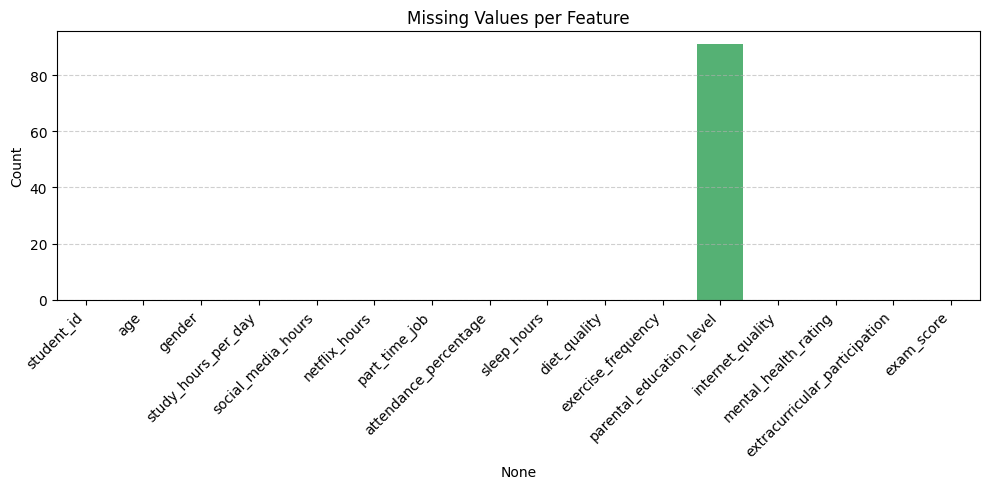


✂️ Dropped 91 rows with missing values.

🧩 Categorical Columns: ['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
Skipping count plot for 'student_id' – too many unique values (909)


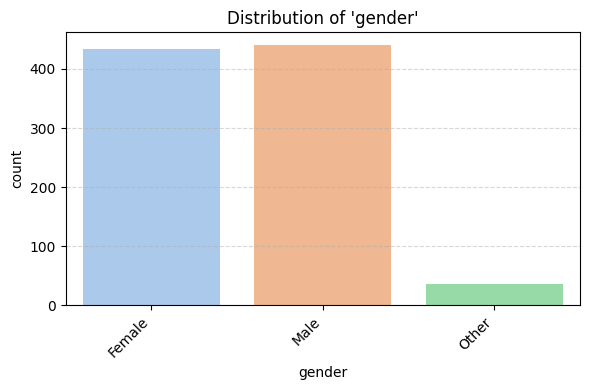

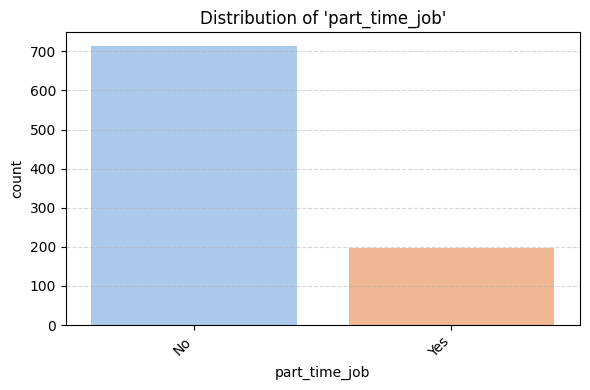

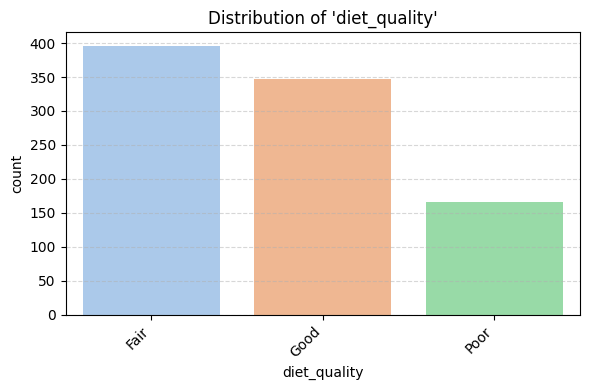

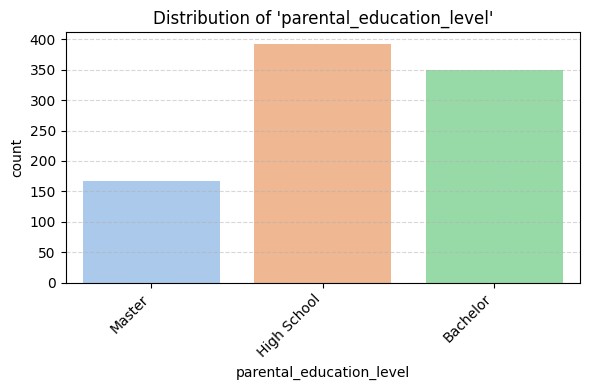

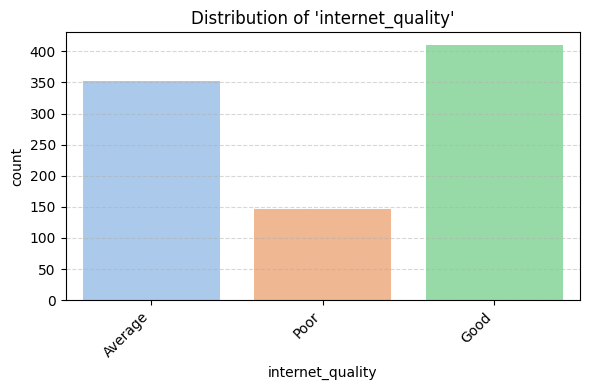

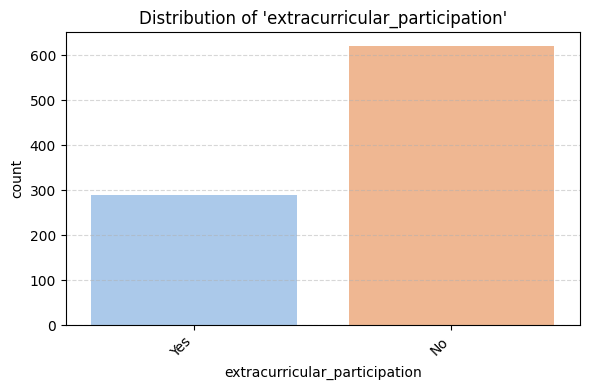


🔄 Label Encoding In Progress...
Encoded 'student_id'. Mappings: {'S1000': np.int64(0), 'S1001': np.int64(1), 'S1002': np.int64(2), 'S1003': np.int64(3), 'S1004': np.int64(4), 'S1005': np.int64(5), 'S1006': np.int64(6), 'S1007': np.int64(7), 'S1008': np.int64(8), 'S1009': np.int64(9), 'S1011': np.int64(10), 'S1012': np.int64(11), 'S1013': np.int64(12), 'S1014': np.int64(13), 'S1015': np.int64(14), 'S1016': np.int64(15), 'S1017': np.int64(16), 'S1018': np.int64(17), 'S1019': np.int64(18), 'S1020': np.int64(19), 'S1021': np.int64(20), 'S1022': np.int64(21), 'S1023': np.int64(22), 'S1024': np.int64(23), 'S1025': np.int64(24), 'S1026': np.int64(25), 'S1027': np.int64(26), 'S1028': np.int64(27), 'S1029': np.int64(28), 'S1030': np.int64(29), 'S1031': np.int64(30), 'S1032': np.int64(31), 'S1034': np.int64(32), 'S1035': np.int64(33), 'S1036': np.int64(34), 'S1037': np.int64(35), 'S1038': np.int64(36), 'S1039': np.int64(37), 'S1040': np.int64(38), 'S1041': np.int64(39), 'S1042': np.int64(40), '

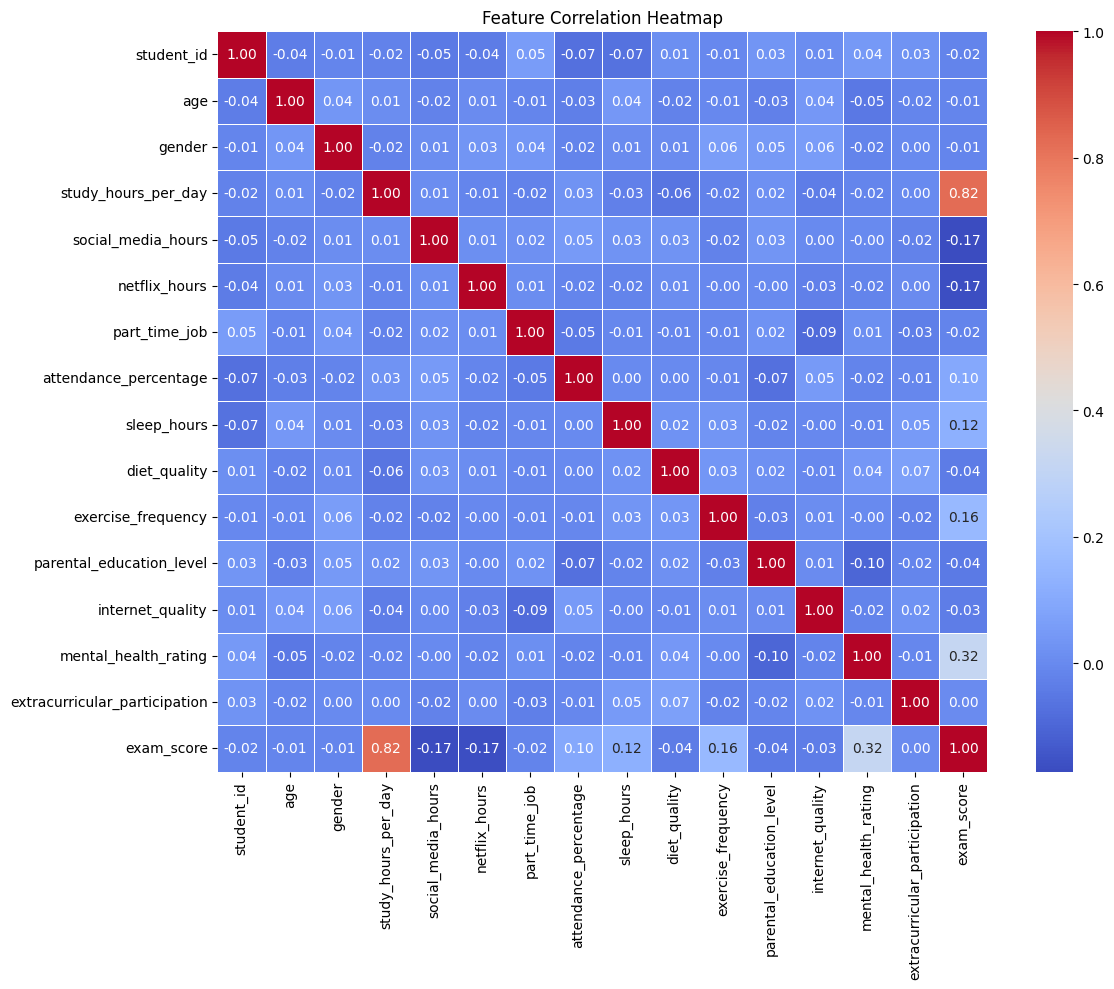


📏 Numeric features scaled.

✅ Scaled Data Preview:
╒════╤══════════════╤═══════════╤═══════════╤═══════════════════════╤══════════════════════╤═════════════════╤═════════════════╤═════════════════════════╤═══════════════╤════════════════╤══════════════════════╤════════════════════════════╤════════════════════╤════════════════════════╤═════════════════════════════════╤══════════════╕
│    │   Student Id │       Age │    Gender │   Study Hours Per Day │   Social Media Hours │   Netflix Hours │   Part Time Job │   Attendance Percentage │   Sleep Hours │   Diet Quality │   Exercise Frequency │   Parental Education Level │   Internet Quality │   Mental Health Rating │   Extracurricular Participation │   Exam Score │
╞════╪══════════════╪═══════════╪═══════════╪═══════════════════════╪══════════════════════╪═════════════════╪═════════════════╪═════════════════════════╪═══════════════╪════════════════╪══════════════════════╪════════════════════════════╪════════════════════╪══════════════════

In [ ]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 🤫 Suppress FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Helper function to format DataFrames into "MS Word-like" Markdown tables
def format_df_for_markdown(df_to_format):
    """
    Formats a DataFrame for Markdown output with Title Case headers,
    centered content, and a 'fancy_grid' table format.
    Index labels are also Title Cased if not a default RangeIndex.
    """
    df_copy = df_to_format.copy()
    # Format column headers
    df_copy.columns = [str(col).replace('_', ' ').title() for col in df_copy.columns]

    # Format index name if it exists
    if df_copy.index.name is not None:
        df_copy.index.name = str(df_copy.index.name).replace('_', ' ').title()

    # Format index labels (e.g., for describe())
    # but not for default RangeIndex (0, 1, 2...)
    if not isinstance(df_copy.index, pd.RangeIndex):
         df_copy.index = [str(idx).replace('_', ' ').title() for idx in df_copy.index]

    return df_copy.to_markdown(tablefmt="fancy_grid", colalign="center")

# 🔍 Load the dataset
file_path = '/content/student_habits_performance.csv' # Make sure this path is correct
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the path.")
    # Create a dummy DataFrame for demonstration if file not found
    data = {
        'student_id': range(1, 6),
        'study_hours_weekly': [10, 5, 15, 8, 12],
        'sleep_hours_daily': [7, 8, 6, 7, 8],
        'social_media_time_daily': [2, 1, 3, 1.5, 2.5],
        'extracurricular_activities': ['Yes', 'No', 'Yes', 'Yes', 'No'],
        'final_grade_percentage': [85, 70, 90, 78, 88]
    }
    df = pd.DataFrame(data)
    print("Using a dummy DataFrame for demonstration as the file was not found.")


# 🧠 Dataset overview
print("📝 Preview of the dataset:")
print(format_df_for_markdown(df.head()))

print("\n📊 Data Summary:")
print(format_df_for_markdown(df.describe()))

print("\n📄 Dataset Information:")
df.info()

# 📉 Check and visualize missing values
missing = df.isnull().sum()
print("\n🚨 Missing Values Per Column:")
print(missing)

plt.figure(figsize=(10, 5))
sns.barplot(x=missing.index, y=missing.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Missing Values per Feature")
plt.ylabel("Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
    # If missing.any() is true but missing_to_plot is empty, it means all missing counts are 0.
    # This case is covered by the initial print statement.


# ✂️ Drop missing values (or use df.fillna() for other strategies)
df_original_rows = len(df)
df = df.dropna()
print(f"\n✂️ Dropped {df_original_rows - len(df)} rows with missing values.")
# The following line was in a previous version, re-adding for context if useful
# print(f"Current shape of DataFrame after dropping NaNs: {df.shape}")


# 🧠 Identify and encode categorical features
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\n🧩 Categorical Columns:", cat_cols)

# Skip plotting high-cardinality identifiers like student_id
for col in cat_cols:
    if df[col].nunique() < 20 and df[col].nunique() > 0:  # Only plot if categories are manageable & col not empty
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, palette='pastel') # Simplified palette call
        plt.title(f"Distribution of '{col}'")
        plt.xticks(rotation=45, ha='right') # Ensure labels don't overlap
        plt.grid(True, axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
    elif df[col].nunique() == 0:
        print(f"Skipping count plot for '{col}' – no unique values.")
    else: # nunique >= 20
        print(f"Skipping count plot for '{col}' – too many unique values ({df[col].nunique()})")


# 🔢 Label Encode categorical variables
le_dict = {}
if cat_cols: # Proceed only if there are categorical columns
    print("\n🔄 Label Encoding In Progress...") # Added this status message
    for col in cat_cols:
        if df[col].nunique() > 0: # Check if column has data to encode
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            le_dict[col] = le
            print(f"Encoded '{col}'. Mappings: {dict(zip(le.classes_, le.transform(le.classes_)))}")
        else:
            print(f"Skipping encoding for '{col}' as it has no unique values.")
    print("Label Encoding Complete.") # Added this status message
else:
    print("\nℹ️ No categorical columns found to encode.")


# 🛠️ Feature Engineering: Total screen time (example)
# Adjust column names based on your dataset!
# For the dummy data provided, 'netflix_time_daily' is not present.
# This section will likely skip for the dummy data.
original_social_media_col = 'social_media_time_daily'
original_netflix_col = 'netflix_time_daily' # This column is not in the new dummy data

if original_social_media_col in df.columns and original_netflix_col in df.columns:
    # Ensure columns are numeric before addition
    if pd.api.types.is_numeric_dtype(df[original_social_media_col]) and pd.api.types.is_numeric_dtype(df[original_netflix_col]):
        df['total_screen_time'] = df[original_social_media_col] + df[original_netflix_col]
        df.drop([original_social_media_col, original_netflix_col], axis=1, inplace=True)
        print(f"\n🛠️ Engineered 'total_screen_time' and dropped '{original_social_media_col}' and '{original_netflix_col}'.")
    else:
        print(f"\n⚠️ Could not create 'total_screen_time'. Columns '{original_social_media_col}' or '{original_netflix_col}' are not numeric.")
elif 'total_screen_time' not in df.columns: # Check if it wasn't already created
    # Modify message if one of the columns is missing
    if not (original_social_media_col in df.columns and original_netflix_col in df.columns):
         print(f"\nℹ️ One or both columns ('{original_social_media_col}', '{original_netflix_col}') not found for 'total_screen_time' engineering. Skipping.")
    else: # Should not be reached if the above is true, but as a fallback
         print(f"\nℹ️ Columns for 'total_screen_time' engineering ('{original_social_media_col}', '{original_netflix_col}') not found. Skipping.")


# 🧮 Correlation heatmap
# Ensure there are numeric columns to correlate
numeric_cols_for_corr = df.select_dtypes(include=np.number).columns
if len(numeric_cols_for_corr) > 1:
    plt.figure(figsize=(12, 10)) # Adjusted for better readability
    corr_df = df[numeric_cols_for_corr].corr()
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ Not enough numeric columns (need at least 2) to generate a correlation heatmap.")


# 📏 Scale numeric features
scaler = StandardScaler()
# Select numeric columns from the current state of df
# Exclude any ID columns if they were accidentally converted to numeric and not dropped
numeric_cols_to_scale = df.select_dtypes(include=[np.number]).columns.tolist()
if 'student_id' in numeric_cols_to_scale: # Example: assuming 'student_id' should not be scaled
    numeric_cols_to_scale.remove('student_id')


df_scaled = df.copy() # Create a copy to store scaled data

if numeric_cols_to_scale: # Proceed only if there are numeric columns to scale
    df_scaled[numeric_cols_to_scale] = scaler.fit_transform(df[numeric_cols_to_scale])
    print("\n📏 Numeric features scaled.")
    # ✅ Preview of final scaled data
    print("\n✅ Scaled Data Preview:")
    print(format_df_for_markdown(df_scaled.head())) # Using formatter here
else:
    print("\nℹ️ No numeric columns found to scale (or left after exclusions).")
    print("\n✅ Original Data Preview (No Scaling Applied):")
    print(format_df_for_markdown(df.head())) # Using formatter here too


print("\n🎉 Analysis script execution complete.")


📌 Detected score column: exam_score


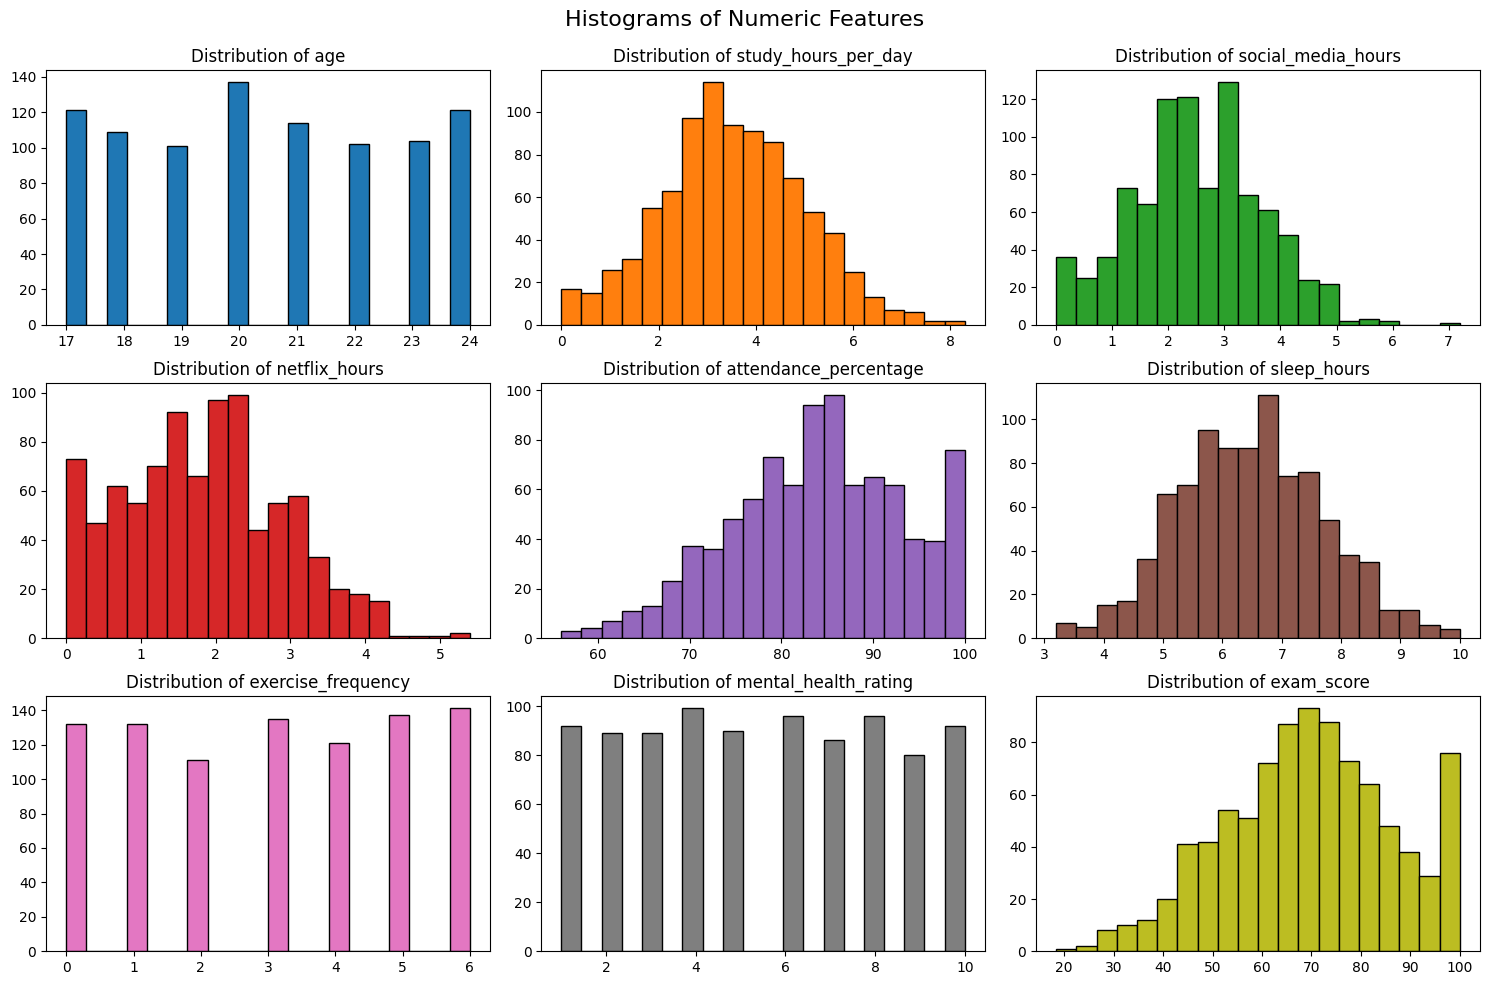


📈 Scatter Plots:


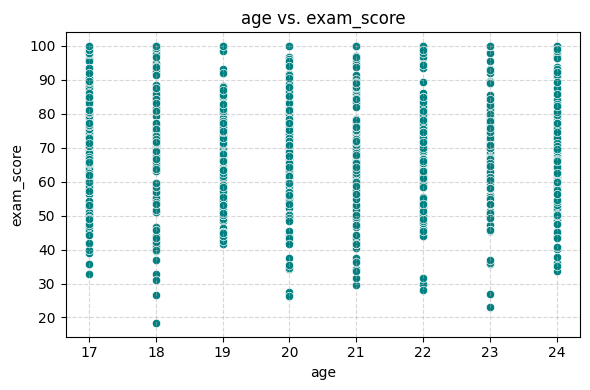

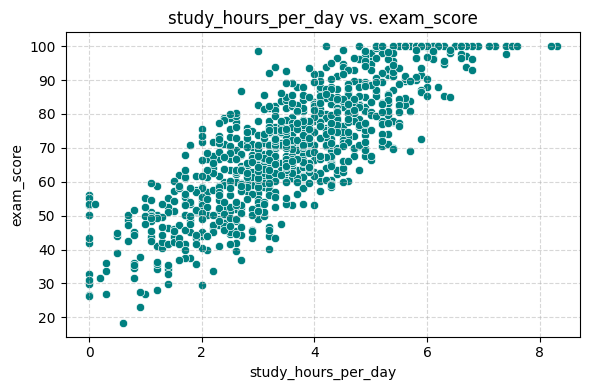

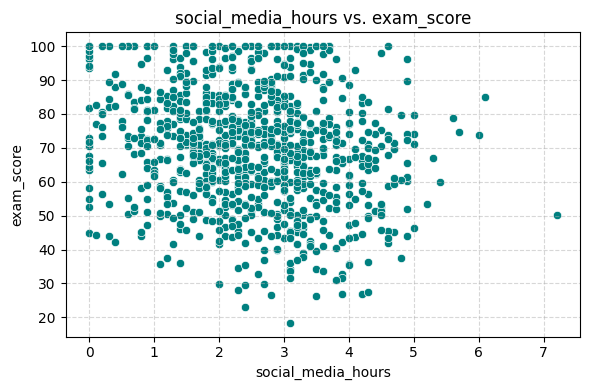

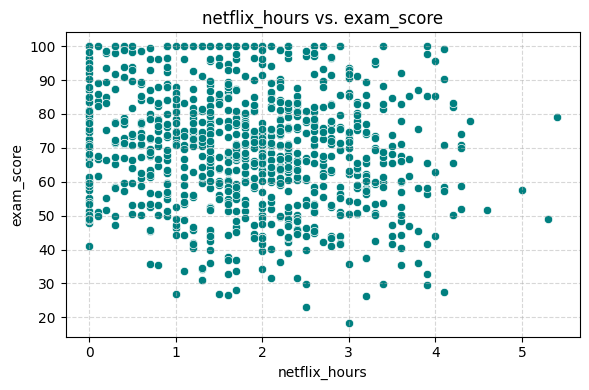

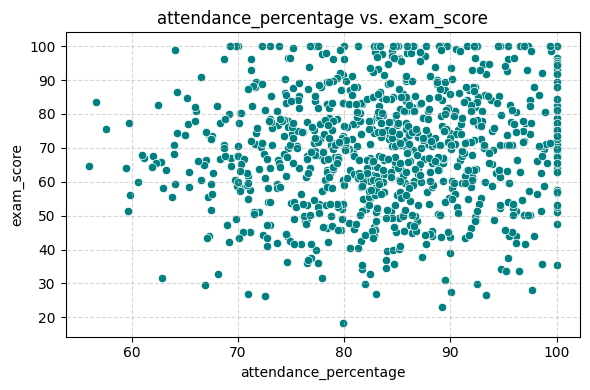

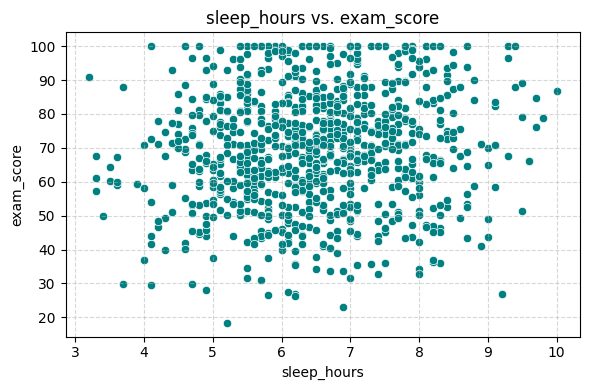

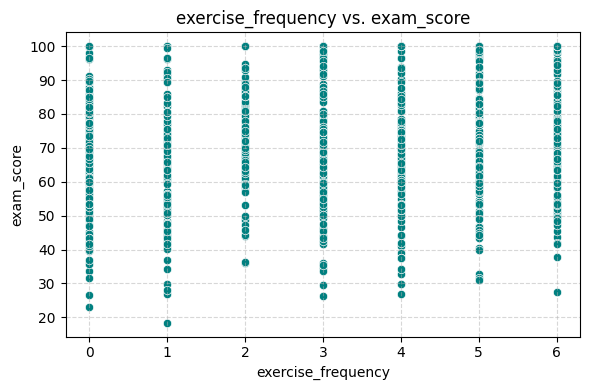

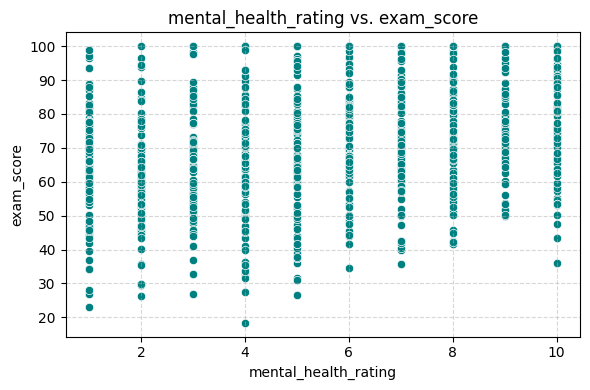


📦 Box Plots for Categorical Columns: ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']


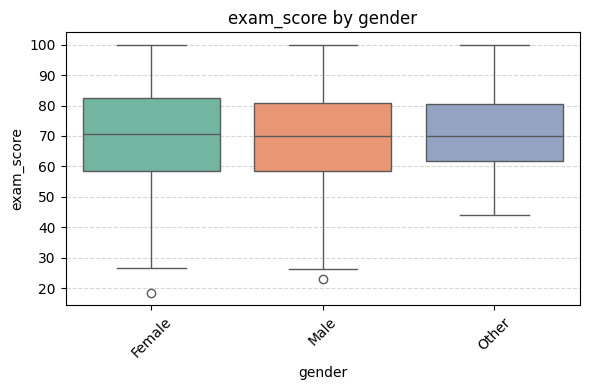

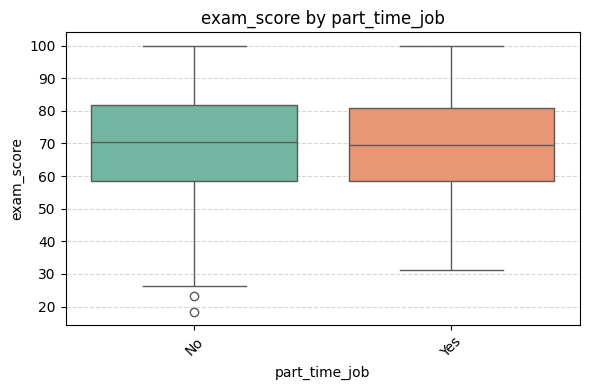

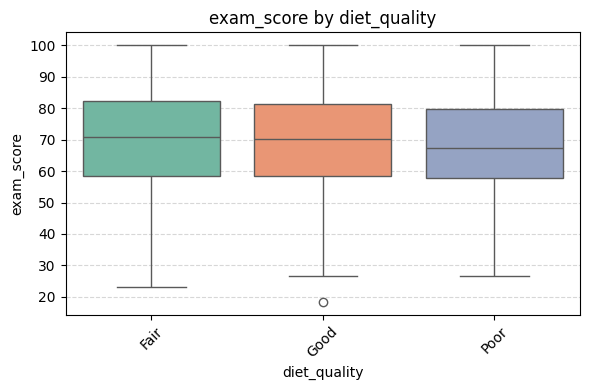

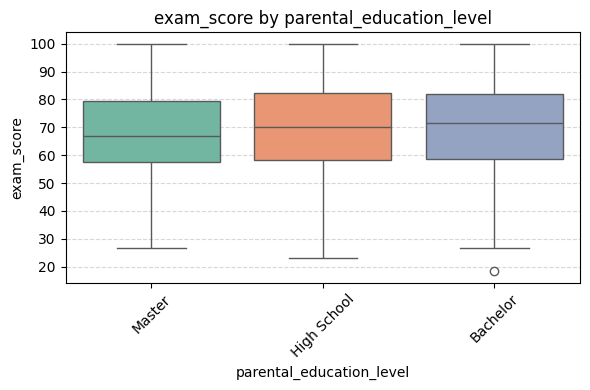

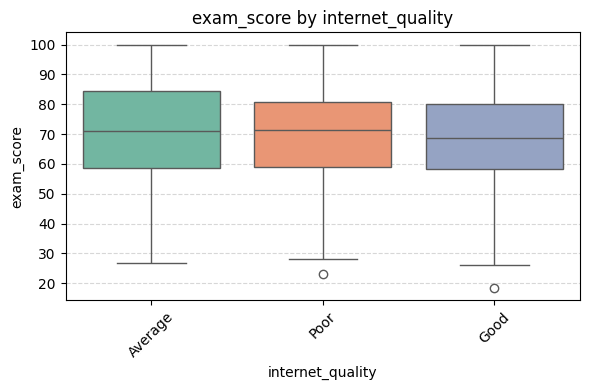

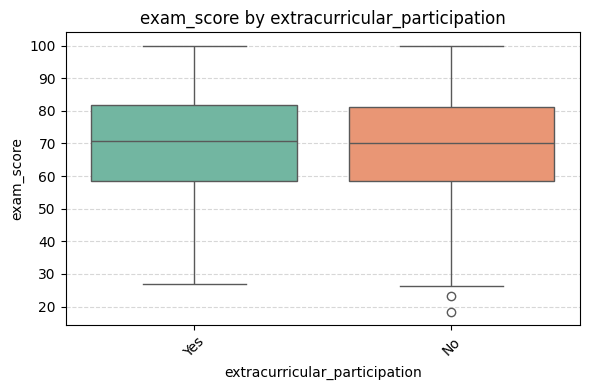

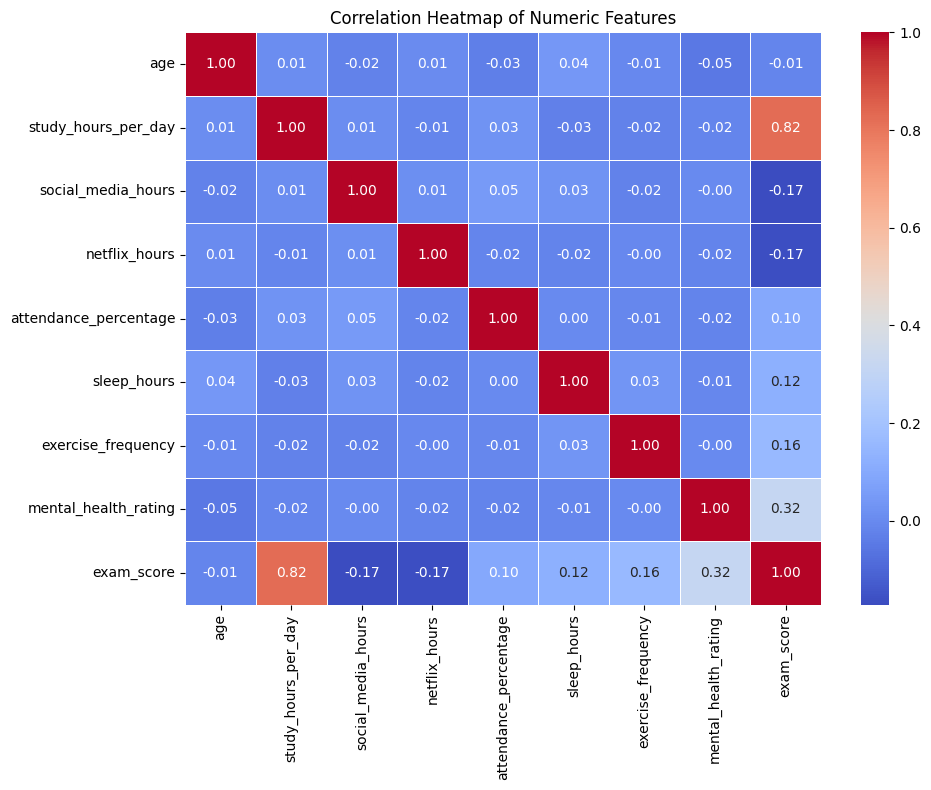

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/student_habits_performance.csv')

# Drop ID if exists
if 'student_id' in df.columns:
    df.drop('student_id', axis=1, inplace=True)

# Drop missing values
df = df.dropna()

# Detect score column
score_col = None
for col in df.columns:
    if 'score' in col.lower() and df[col].dtype in ['int64', 'float64']:
        score_col = col
        break

if score_col is None:
    raise ValueError("⚠️ No column found that appears to be a final exam score.")

print(f"📌 Detected score column: {score_col}")

# ------------------------
# 📊 1. HISTOGRAMS
# ------------------------
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
colors = plt.cm.tab10.colors

plt.figure(figsize=(15, 10))
for idx, col in enumerate(numeric_cols):
    plt.subplot(3, 3, idx+1)
    plt.hist(df[col], bins=20, color=colors[idx % len(colors)], edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# ------------------------
# 📈 2. SCATTER PLOTS (Numeric habits vs. Score)
# ------------------------
habit_columns = [col for col in numeric_cols if col != score_col]

print("\n📈 Scatter Plots:")
for col in habit_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y=score_col, color='teal')
    plt.title(f'{col} vs. {score_col}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# ------------------------
# 📦 3. BOX PLOTS (Categorical vs. Score)
# ------------------------
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\n📦 Box Plots for Categorical Columns:", categorical_cols)

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, y=score_col, palette='Set2')
    plt.title(f'{score_col} by {col}')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# ------------------------
# 🔥 4. CORRELATION HEATMAP
# ------------------------
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


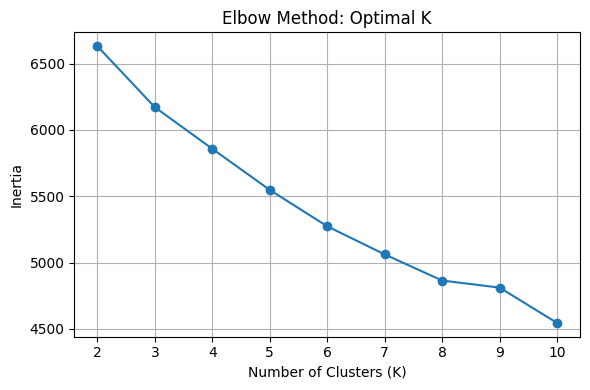

📊 Silhouette Scores:
K = 2 → Silhouette Score: 0.0866
K = 3 → Silhouette Score: 0.0818
K = 4 → Silhouette Score: 0.0804
K = 5 → Silhouette Score: 0.0839
K = 6 → Silhouette Score: 0.0892
K = 7 → Silhouette Score: 0.0929
K = 8 → Silhouette Score: 0.0919
K = 9 → Silhouette Score: 0.0837
K = 10 → Silhouette Score: 0.0921

📌 Cluster Summary:


age  study_hours_per_day  social_media_hours  netflix_hours  \
Cluster                                                                      
0        19.937908             3.929085            2.483660       2.453595   
1        19.789474             3.301858            2.623529       1.069350   
2        21.853571             3.385357            2.390357       2.027143   

         attendance_percentage  sleep_hours  exercise_frequency  \
Cluster                                                           
0                    86.142484     5.527451            2.702614   
1                    87.037771     6.850155            3.204334   
2                    77.765714     7.074643            3.257143   

         mental_health_rating  exam_score  
Cluster                                    
0                    5.326797   69.554248  
1                    6.950464   73.280805  
2                    3.907143   65.268214

🧠 Cluster Descriptions:

Cluster 0 Insights:
  🔺 High in: attendance_percentage, exam_score, age
  🔻 Low in: netflix_hours, social_media_hours, exercise_frequency

Cluster 1 Insights:
  🔺 High in: attendance_percentage, exam_score, age
  🔻 Low in: netflix_hours, social_media_hours, exercise_frequency

Cluster 2 Insights:
  🔺 High in: attendance_percentage, exam_score, age
  🔻 Low in: netflix_hours, social_media_hours, exercise_frequency


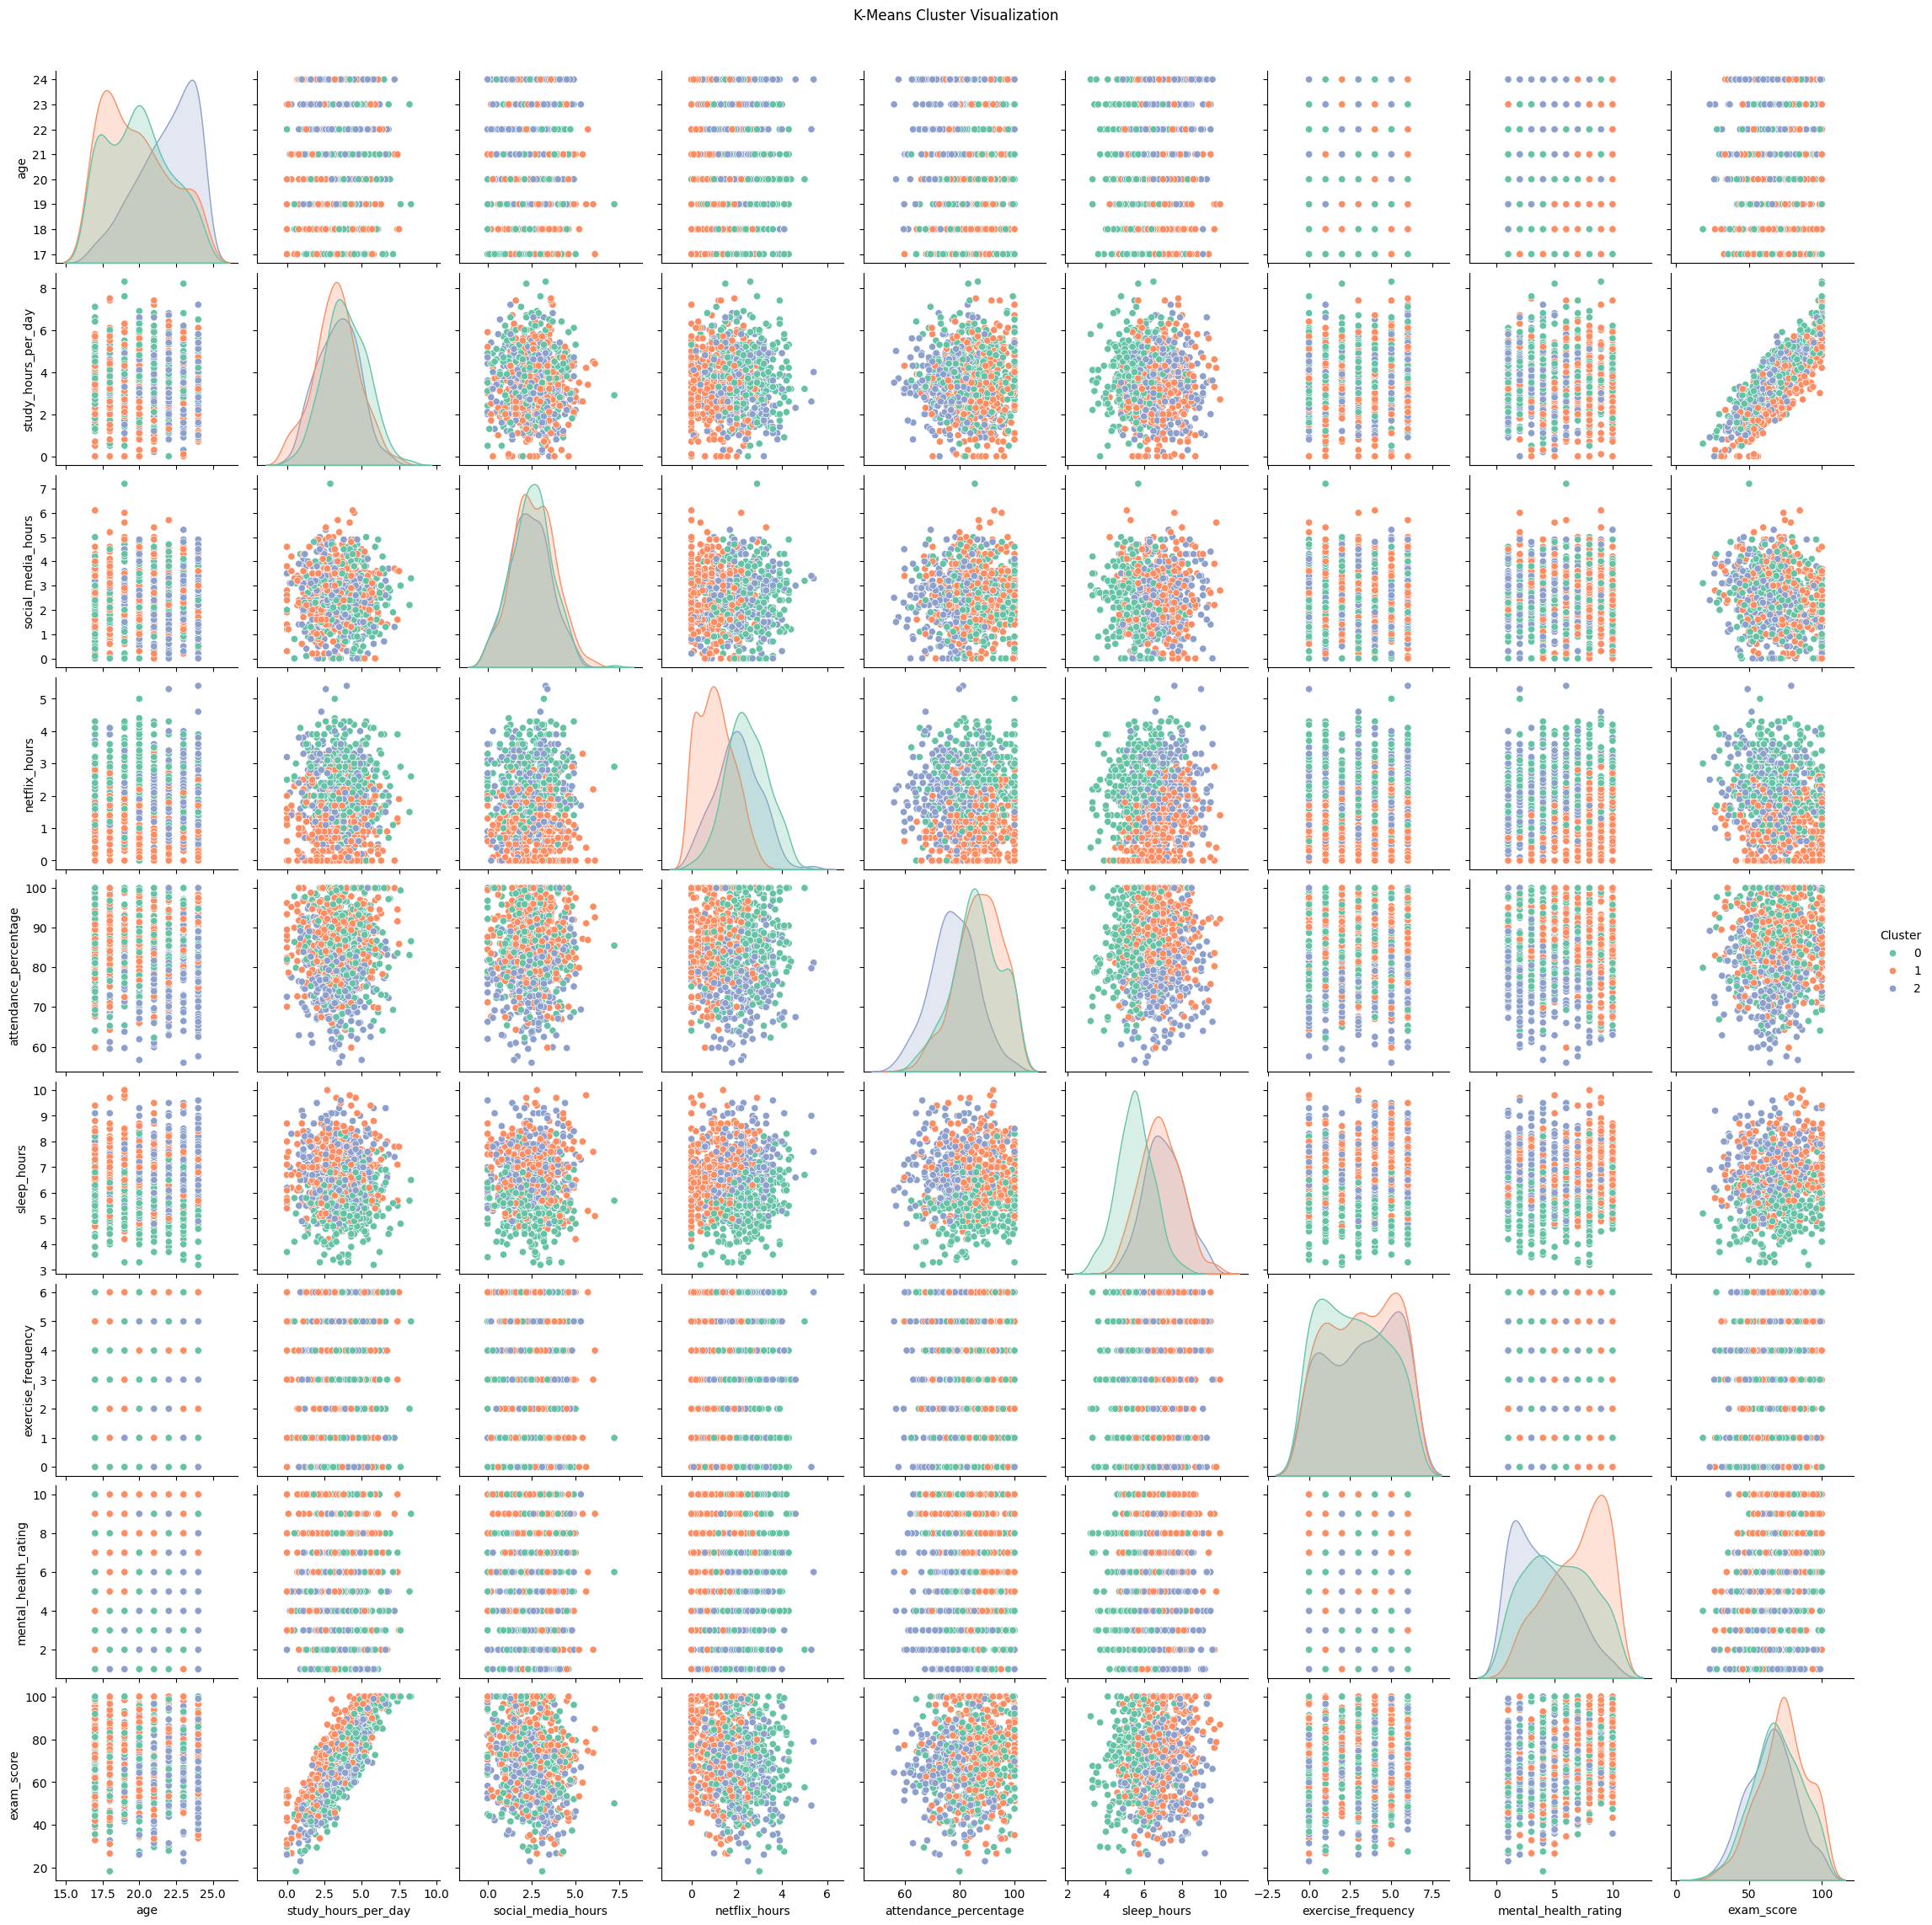

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 📥 Load the dataset
df = pd.read_csv('/content/student_habits_performance.csv')

# 🧼 Drop identifier and handle missing values
if 'student_id' in df.columns:
    df.drop('student_id', axis=1, inplace=True)
df = df.dropna()

# 🔍 Detect and exclude score column
score_col = None
for col in df.columns:
    if 'score' in col.lower() and df[col].dtype in ['int64', 'float64']:
        score_col = col
        break

# Drop score column for clustering
df_cluster = df.drop(columns=[score_col]) if score_col else df.copy()

# Use only numeric lifestyle features
X = df_cluster.select_dtypes(include=['int64', 'float64'])

# 📏 Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------------------
# 🔢 Determine optimal K using Elbow Method
# ----------------------------------------
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method: Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------------------
# 📈 Silhouette Score Evaluation
# ----------------------------------------
print("📊 Silhouette Scores:")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K = {k} → Silhouette Score: {score:.4f}")

# ----------------------------------------
# 🤖 Apply Final K-Means Clustering (Choose Best K)
# ----------------------------------------
best_k = 3  # 👈 Adjust this based on elbow + silhouette results
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# ----------------------------------------
# 📊 Cluster Summary Table
# ----------------------------------------
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print("\n📌 Cluster Summary:")
display(cluster_summary)

# ----------------------------------------
# 🧠 Cluster Descriptions (High/Low features per cluster)
# ----------------------------------------
print("🧠 Cluster Descriptions:")
for i, row in cluster_summary.iterrows():
    print(f"\nCluster {i} Insights:")
    top_features = row.sort_values(ascending=False).head(3)
    low_features = row.sort_values(ascending=True).head(3)
    print(f"  🔺 High in: {', '.join(top_features.index)}")
    print(f"  🔻 Low in: {', '.join(low_features.index)}")

# ----------------------------------------
# 📉 Optional: Pairplot visualization
# ----------------------------------------
sns.pairplot(df, hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("K-Means Cluster Visualization", y=1.02)
plt.show()


#III. **PROJECT COMPONENTS**

1. Problem Definition <p align="justify">
   Formulate a clear research question.

#**"How do sleep duration and social media usage impact the academic performance of undergraduate students, as measured by their examination scores?"**



2. Data Understanding and Preprocessing

3. Exploratory Data Analysis

4. Clustering (Unsupervised Learning)

5. Regression Analysis <p align="justify">
Using the following models to predict Final Exam Score: <p align="justify">

   o Linear Regression <p align="justify">

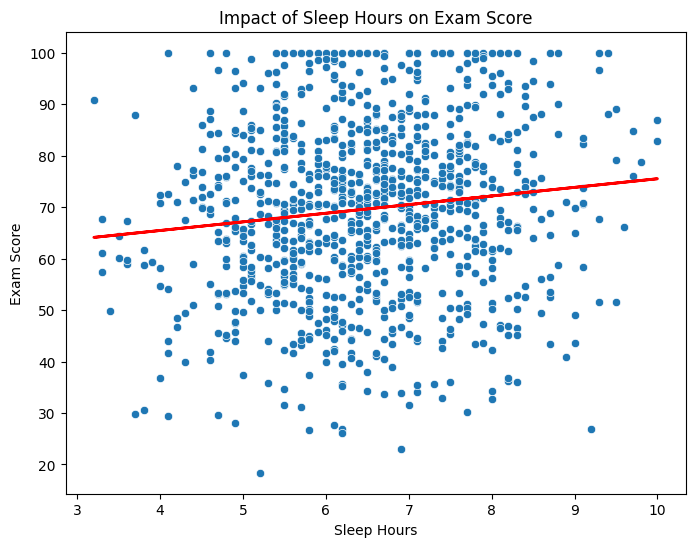

Figure 1: This figure shows the relationship between the number of hours students sleep and their exam scores. The scatter plot represents individual students' data points. The red line is the linear regression line, which estimates the average exam score for a given number of sleep hours. Based on the upward slope of the line, it suggests that, on average, more sleep hours are associated with higher exam scores.


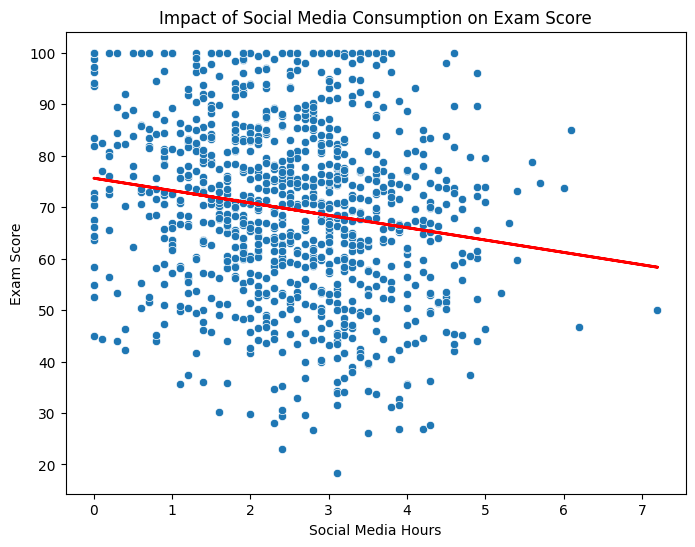

Figure 2: This figure illustrates how the number of hours students spend on social media relates to their exam scores. The scatter points are the actual data, and the red line is the linear regression fit. A downward slope in this line would suggest that increased social media usage is associated with lower exam scores, while an upward slope or flat line would indicate a different relationship or no clear relationship based on this simple linear model.


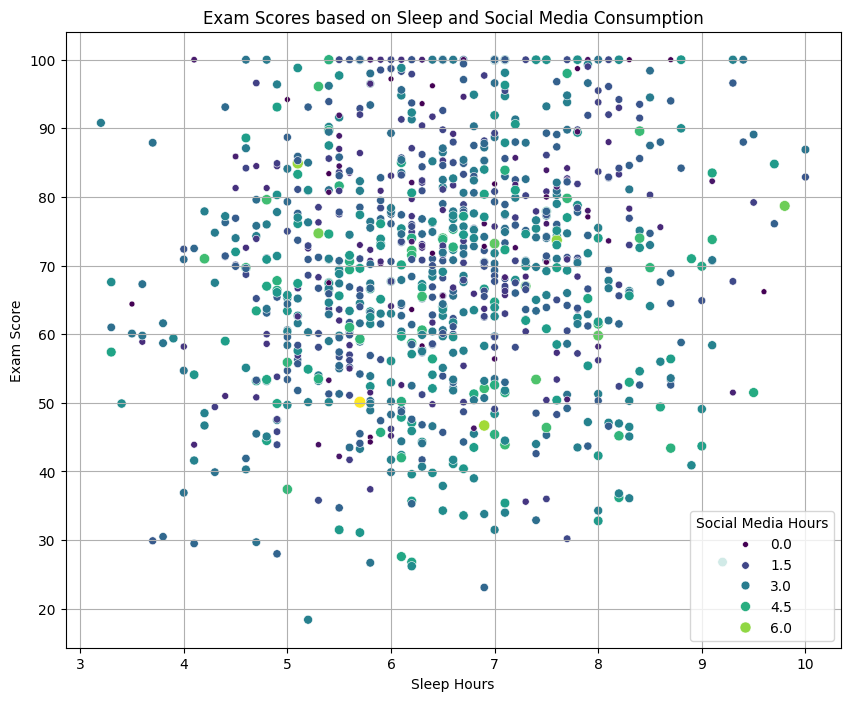

Figure 3: This figure provides a multi-dimensional view of the data. It plots exam scores against sleep hours, with the color and size of each point representing the amount of time a student spends on social media. This allows for visual inspection of potential interactions: are high sleep hours always associated with high scores, regardless of social media use? Does high social media use tend to correspond with lower scores, particularly for students with less sleep? The color gradient and point size visually highlight the social media impact alongside sleep and exam scores.


In [ ]:
!pip install openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the data
df = pd.read_csv('/content/student_habits_performance.csv')


# Drop rows with missing values if any (important for regression)
df.dropna(subset=['sleep_hours', 'social_media_hours', 'exam_score'], inplace=True)

# Figure 1: Impact of Sleep_Hours on Exam Score
X_sleep = df[['sleep_hours']]
y_score = df['exam_score']

model_sleep = LinearRegression()
model_sleep.fit(X_sleep, y_score)
y_pred_sleep = model_sleep.predict(X_sleep)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='sleep_hours', y='exam_score', data=df)
plt.plot(X_sleep, y_pred_sleep, color='red', linewidth=2)
plt.title('Impact of Sleep Hours on Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.show()

print("Figure 1: This figure shows the relationship between the number of hours students sleep and their exam scores. The scatter plot represents individual students' data points. The red line is the linear regression line, which estimates the average exam score for a given number of sleep hours. Based on the upward slope of the line, it suggests that, on average, more sleep hours are associated with higher exam scores.")

# Figure 2: Impact of Social Media Consumption on Exam Score
X_social = df[['social_media_hours']]
y_score = df['exam_score']

model_social = LinearRegression()
model_social.fit(X_social, y_score)
y_pred_social = model_social.predict(X_social)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='social_media_hours', y='exam_score', data=df)
plt.plot(X_social, y_pred_social, color='red', linewidth=2)
plt.title('Impact of Social Media Consumption on Exam Score')
plt.xlabel('Social Media Hours')
plt.ylabel('Exam Score')
plt.show()

print("Figure 2: This figure illustrates how the number of hours students spend on social media relates to their exam scores. The scatter points are the actual data, and the red line is the linear regression fit. A downward slope in this line would suggest that increased social media usage is associated with lower exam scores, while an upward slope or flat line would indicate a different relationship or no clear relationship based on this simple linear model.")

# Figure 3: Comparing Scores based on Sleep and Social Media Consumption
plt.figure(figsize=(10, 8))
sns.scatterplot(x='sleep_hours', y='exam_score', hue='social_media_hours', size='social_media_hours', data=df, palette='viridis')
plt.title('Exam Scores based on Sleep and Social Media Consumption')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.legend(title='Social Media Hours')
plt.grid(True)
plt.show()

print("Figure 3: This figure provides a multi-dimensional view of the data. It plots exam scores against sleep hours, with the color and size of each point representing the amount of time a student spends on social media. This allows for visual inspection of potential interactions: are high sleep hours always associated with high scores, regardless of social media use? Does high social media use tend to correspond with lower scores, particularly for students with less sleep? The color gradient and point size visually highlight the social media impact alongside sleep and exam scores.")


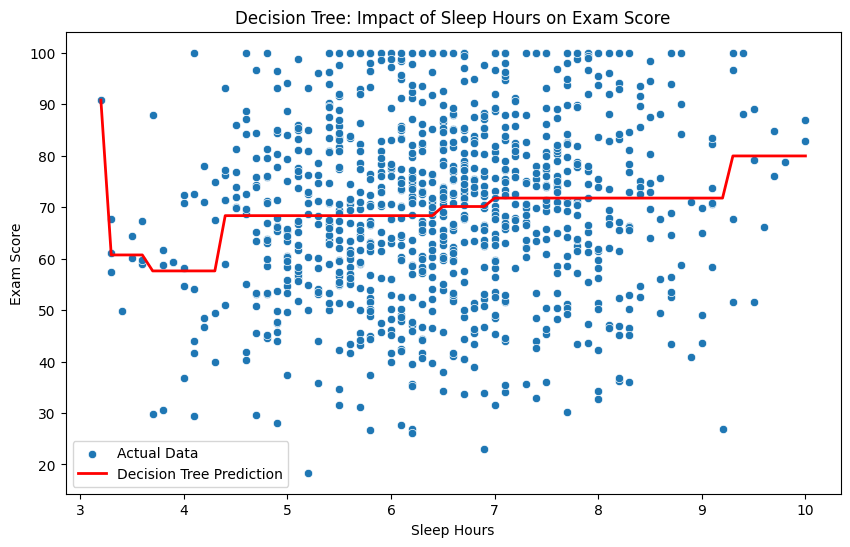

Figure 1: This figure illustrates the relationship between sleep hours and exam scores using a Decision Tree Regressor. The scatter plot shows the actual student data. The red line represents the predictions made by the decision tree model. Unlike linear regression, a decision tree makes predictions by splitting the data based on sleep hour thresholds, resulting in a step-like function. This can capture non-linear relationships in the data.


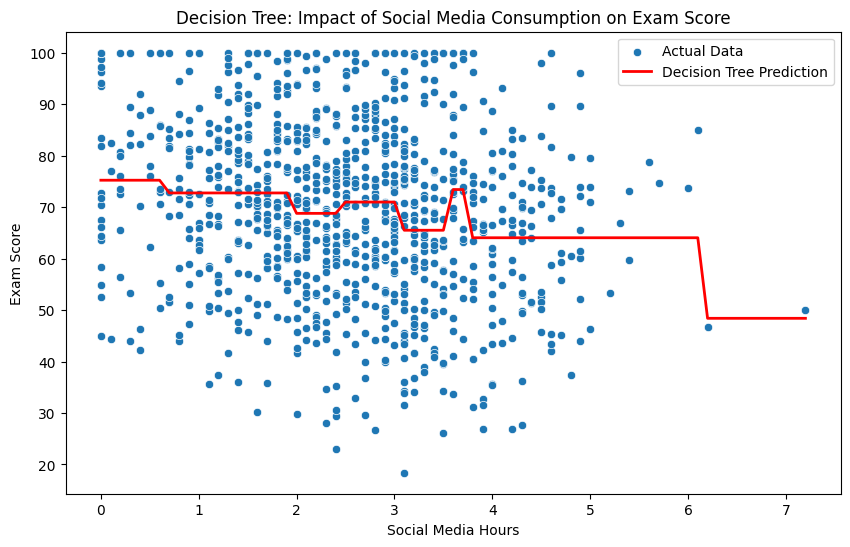

Figure 2: This figure shows the effect of social media consumption on exam scores using a Decision Tree Regressor. Similar to the previous figure, the scatter points are the actual data, and the red line depicts the decision tree's predictions. The stepped line indicates how the model divides students into groups based on their social media usage and assigns an average exam score to each group. This allows us to see if certain ranges of social media usage are associated with distinct exam score ranges.


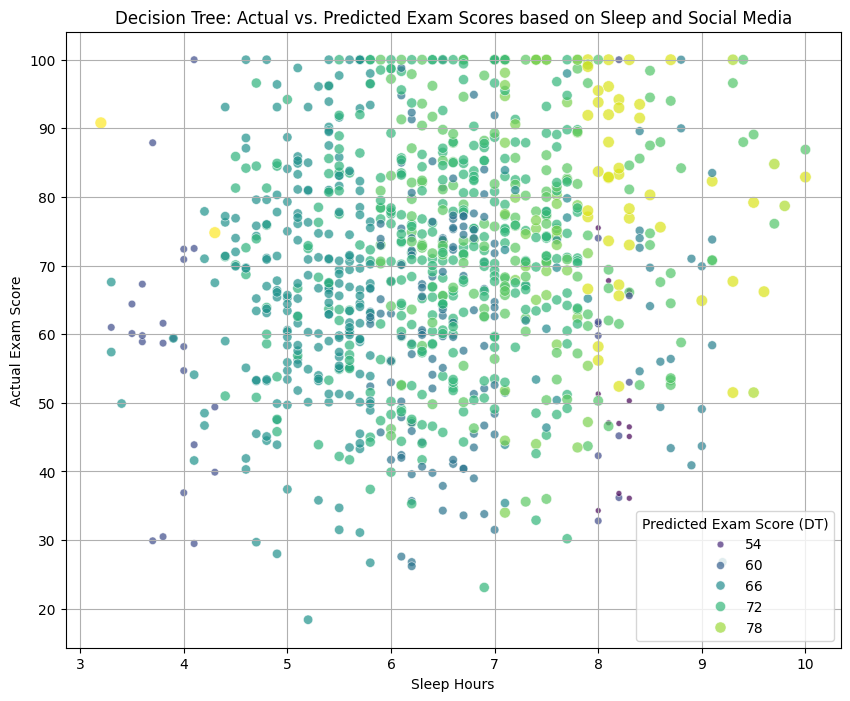

Figure 3: This figure uses a scatter plot to visualize the actual exam scores against sleep hours, where the color and size of each point represent the exam score predicted by the Decision Tree model trained on both sleep and social media hours. This helps to visually compare the model's predictions to the actual outcomes. Areas with similar colors or sizes indicate groups of students that the decision tree model predicts to have similar exam scores based on their combined sleep and social media habits. It helps understand how the model's logic groups students based on these two factors.


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Figure 1: Impact of Sleep_Hours on Exam Score using Decision Tree
X_sleep = df[['sleep_hours']]
y_score = df['exam_score']

# Train a Decision Tree Regressor model for sleep hours
dt_sleep = DecisionTreeRegressor(max_depth=3) # Limit depth for interpretability
dt_sleep.fit(X_sleep, y_score)
y_pred_dt_sleep = dt_sleep.predict(X_sleep)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sleep_hours', y='exam_score', data=df, label='Actual Data')
sleep_sorted = X_sleep.sort_values(by='sleep_hours')
y_pred_dt_sleep_sorted = dt_sleep.predict(sleep_sorted)
plt.plot(sleep_sorted, y_pred_dt_sleep_sorted, color='red', linewidth=2, label='Decision Tree Prediction')
plt.title('Decision Tree: Impact of Sleep Hours on Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

print("Figure 1: This figure illustrates the relationship between sleep hours and exam scores using a Decision Tree Regressor. The scatter plot shows the actual student data. The red line represents the predictions made by the decision tree model. Unlike linear regression, a decision tree makes predictions by splitting the data based on sleep hour thresholds, resulting in a step-like function. This can capture non-linear relationships in the data.")

# Figure 2: Impact of Social Media Consumption on Exam Score using Decision Tree
X_social = df[['social_media_hours']]
y_score = df['exam_score']

# Train a Decision Tree Regressor model for social media hours
dt_social = DecisionTreeRegressor(max_depth=3) # Limit depth for interpretability
dt_social.fit(X_social, y_score)
y_pred_dt_social = dt_social.predict(X_social)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='social_media_hours', y='exam_score', data=df, label='Actual Data')
social_sorted = X_social.sort_values(by='social_media_hours')
y_pred_dt_social_sorted = dt_social.predict(social_sorted)
plt.plot(social_sorted, y_pred_dt_social_sorted, color='red', linewidth=2, label='Decision Tree Prediction')
plt.title('Decision Tree: Impact of Social Media Consumption on Exam Score')
plt.xlabel('Social Media Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

print("Figure 2: This figure shows the effect of social media consumption on exam scores using a Decision Tree Regressor. Similar to the previous figure, the scatter points are the actual data, and the red line depicts the decision tree's predictions. The stepped line indicates how the model divides students into groups based on their social media usage and assigns an average exam score to each group. This allows us to see if certain ranges of social media usage are associated with distinct exam score ranges.")

# Figure 3: Comparing Scores based on Sleep and Social Media Consumption using Decision Tree (Simplified Visualization)

# Train a Decision Tree Regressor with both features
X_combined = df[['sleep_hours', 'social_media_hours']]
y_score = df['exam_score']

dt_combined = DecisionTreeRegressor(max_depth=4) # Allow slightly deeper tree for two features
dt_combined.fit(X_combined, y_score)

df['predicted_score_dt'] = dt_combined.predict(X_combined)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='sleep_hours', y='exam_score', hue='predicted_score_dt', size='predicted_score_dt', data=df, palette='viridis', alpha=0.7)
plt.title('Decision Tree: Actual vs. Predicted Exam Scores based on Sleep and Social Media')
plt.xlabel('Sleep Hours')
plt.ylabel('Actual Exam Score')
plt.legend(title='Predicted Exam Score (DT)')
plt.grid(True)
plt.show()


print("Figure 3: This figure uses a scatter plot to visualize the actual exam scores against sleep hours, where the color and size of each point represent the exam score predicted by the Decision Tree model trained on both sleep and social media hours. This helps to visually compare the model's predictions to the actual outcomes. Areas with similar colors or sizes indicate groups of students that the decision tree model predicts to have similar exam scores based on their combined sleep and social media habits. It helps understand how the model's logic groups students based on these two factors.")



       o Random Forest Regressor

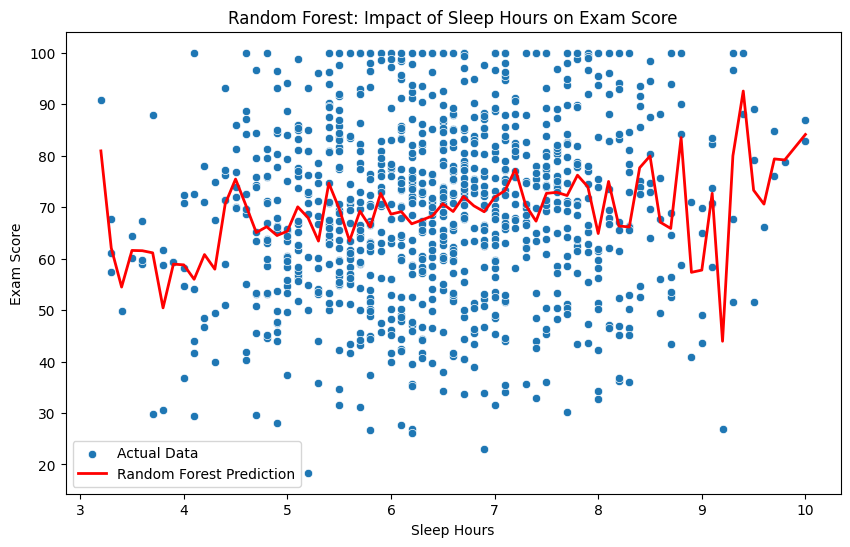

Figure 1: This figure displays the relationship between sleep hours and exam scores as predicted by a Random Forest Regressor. The scatter points show the actual student data. The red line represents the ensemble prediction from multiple decision trees within the Random Forest. Random Forests tend to produce smoother prediction lines than individual decision trees and can often capture complex relationships more effectively than linear regression, reflecting the average prediction across many trees.


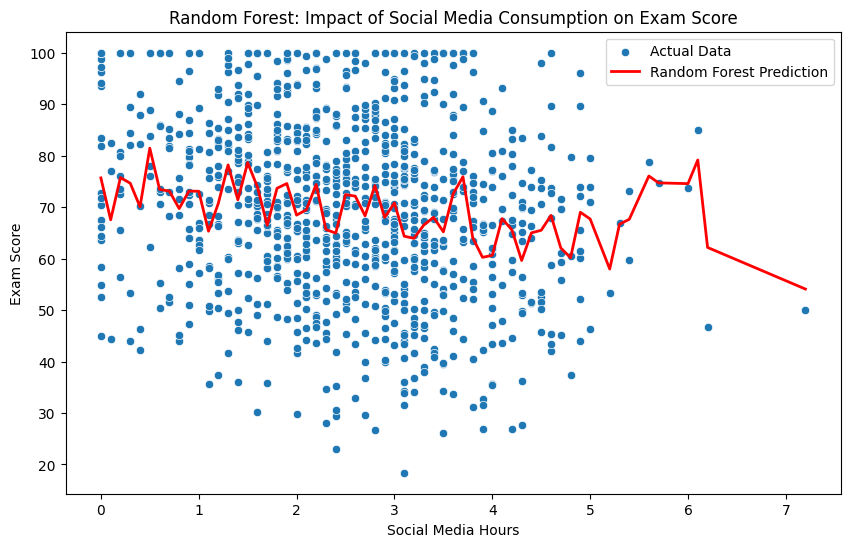

Figure 2: This figure visualizes the impact of social media consumption on exam scores using a Random Forest Regressor. The scatter points represent the actual data. The red line shows the prediction of the Random Forest model. This prediction is an average of the predictions from multiple decision trees, each trained on a random subset of the data and features. It helps in understanding how the model collectively interprets the relationship between social media usage and exam performance, often showing a less jagged prediction line than a single decision tree.


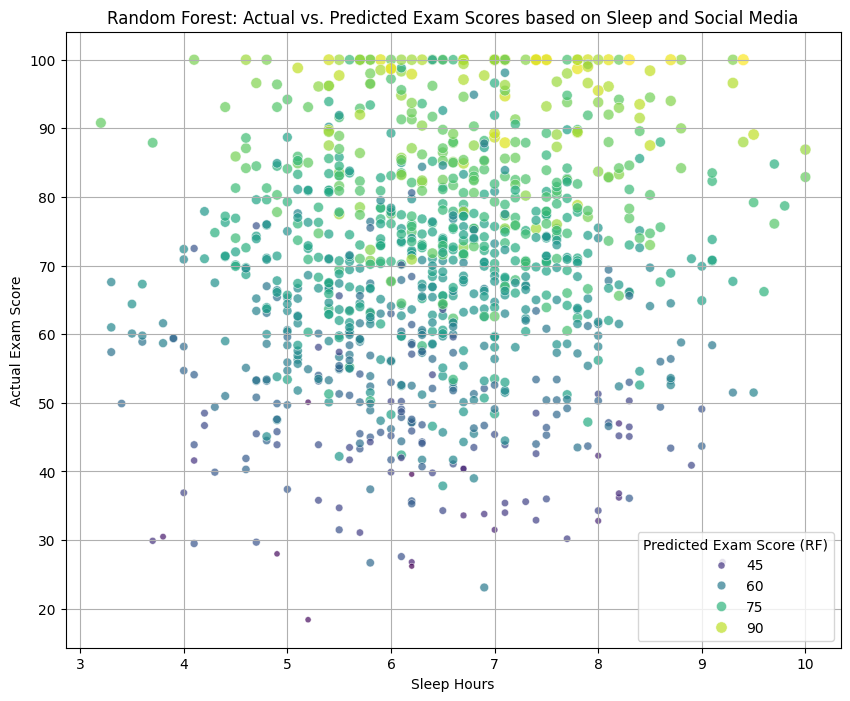

Figure 3: This figure uses a scatter plot to show the actual exam scores plotted against sleep hours, with the color and size of each point indicating the exam score predicted by the Random Forest model using both sleep and social media hours as input. By visually comparing the actual y-position (actual score) with the color/size (predicted score), you can assess how well the Random Forest model's combined consideration of sleep and social media aligns with the real data. Regions where points of similar actual scores are also predicted similarly (similar color/size) indicate areas where the model is performing well.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Figure 1: Impact of Sleep_Hours on Exam Score using Random Forest
X_sleep = df[['sleep_hours']]
y_score = df['exam_score']

# Train a Random Forest Regressor model for sleep hours
rf_sleep = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sleep.fit(X_sleep, y_score)
y_pred_rf_sleep = rf_sleep.predict(X_sleep)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sleep_hours', y='exam_score', data=df, label='Actual Data')
# To show the Random Forest's prediction, we need to sort the x values
sleep_sorted = X_sleep.sort_values(by='sleep_hours')
y_pred_rf_sleep_sorted = rf_sleep.predict(sleep_sorted)
plt.plot(sleep_sorted, y_pred_rf_sleep_sorted, color='red', linewidth=2, label='Random Forest Prediction')
plt.title('Random Forest: Impact of Sleep Hours on Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

print("Figure 1: This figure displays the relationship between sleep hours and exam scores as predicted by a Random Forest Regressor. The scatter points show the actual student data. The red line represents the ensemble prediction from multiple decision trees within the Random Forest. Random Forests tend to produce smoother prediction lines than individual decision trees and can often capture complex relationships more effectively than linear regression, reflecting the average prediction across many trees.")

# Figure 2: Impact of Social Media Consumption on Exam Score using Random Forest
X_social = df[['social_media_hours']]
y_score = df['exam_score']

# Train a Random Forest Regressor model for social media hours
rf_social = RandomForestRegressor(n_estimators=100, random_state=42)
rf_social.fit(X_social, y_score)
y_pred_rf_social = rf_social.predict(X_social)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='social_media_hours', y='exam_score', data=df, label='Actual Data')
# To show the Random Forest's prediction, sort the x values
social_sorted = X_social.sort_values(by='social_media_hours')
y_pred_rf_social_sorted = rf_social.predict(social_sorted)
plt.plot(social_sorted, y_pred_rf_social_sorted, color='red', linewidth=2, label='Random Forest Prediction')
plt.title('Random Forest: Impact of Social Media Consumption on Exam Score')
plt.xlabel('Social Media Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

print("Figure 2: This figure visualizes the impact of social media consumption on exam scores using a Random Forest Regressor. The scatter points represent the actual data. The red line shows the prediction of the Random Forest model. This prediction is an average of the predictions from multiple decision trees, each trained on a random subset of the data and features. It helps in understanding how the model collectively interprets the relationship between social media usage and exam performance, often showing a less jagged prediction line than a single decision tree.")

# Figure 3: Comparing Scores based on Sleep and Social Media Consumption using Random Forest (Simplified Visualization)

# Train a Random Forest Regressor with both features
X_combined = df[['sleep_hours', 'social_media_hours']]
y_score = df['exam_score']

rf_combined = RandomForestRegressor(n_estimators=100, random_state=42)
rf_combined.fit(X_combined, y_score)

# Add predicted score to the dataframe for visualization
df['predicted_score_rf'] = rf_combined.predict(X_combined)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='sleep_hours', y='exam_score', hue='predicted_score_rf', size='predicted_score_rf', data=df, palette='viridis', alpha=0.7)
plt.title('Random Forest: Actual vs. Predicted Exam Scores based on Sleep and Social Media')
plt.xlabel('Sleep Hours')
plt.ylabel('Actual Exam Score')
plt.legend(title='Predicted Exam Score (RF)')
plt.grid(True)
plt.show()

print("Figure 3: This figure uses a scatter plot to show the actual exam scores plotted against sleep hours, with the color and size of each point indicating the exam score predicted by the Random Forest model using both sleep and social media hours as input. By visually comparing the actual y-position (actual score) with the color/size (predicted score), you can assess how well the Random Forest model's combined consideration of sleep and social media aligns with the real data. Regions where points of similar actual scores are also predicted similarly (similar color/size) indicate areas where the model is performing well.")


Evaluate models using: <p align="justify">
o MAE, RMSE, R-square score

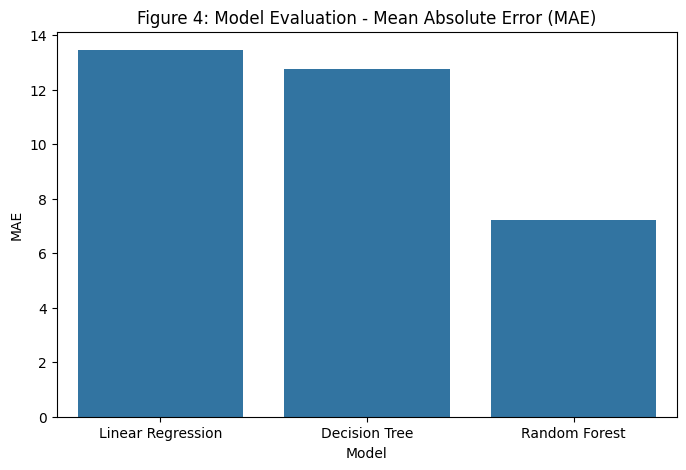

Figure 4: This bar chart compares the Mean Absolute Error (MAE) for each regression model. MAE represents the average magnitude of the errors between the predicted and actual exam scores. A lower MAE indicates that the model's predictions are, on average, closer to the true values. Comparing the bars allows us to see which model has the smallest average prediction error.


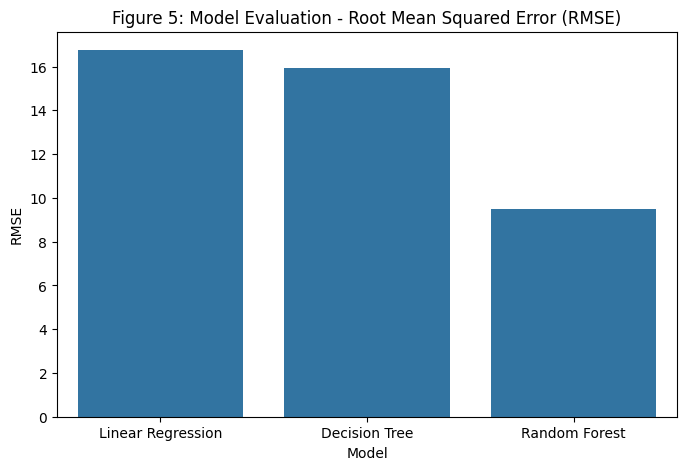

Figure 5: This bar chart presents the Root Mean Squared Error (RMSE) for each model. RMSE is similar to MAE but penalizes larger errors more heavily because the differences are squared before being averaged and the square root is taken. A lower RMSE suggests that the model's predictions are not only close on average but also avoid large, significant errors. This metric provides insight into the typical error magnitude, giving more weight to outliers compared to MAE.


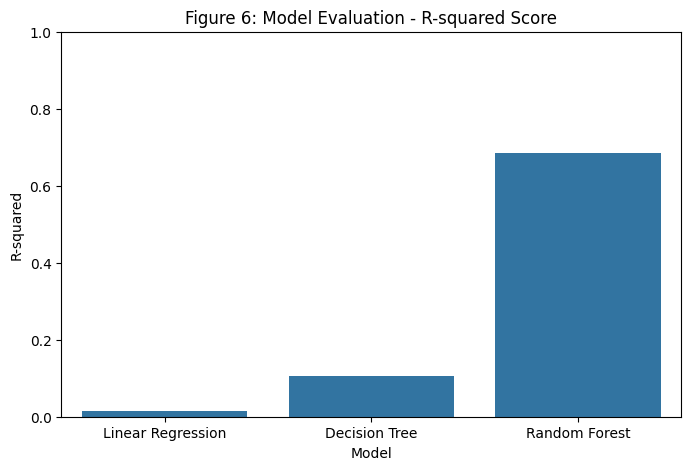

Figure 6: This bar chart illustrates the R-squared score for each model. R-squared, also known as the coefficient of determination, represents the proportion of the variance in the dependent variable (exam score) that is predictable from the independent variables (sleep and social media hours) using the model. An R-squared value closer to 1 indicates that a larger proportion of the variance in exam scores is explained by the model, suggesting a better fit to the data. An R-squared of 0 means the model explains none of the variance, and a negative R-squared indicates the model is worse than simply predicting the mean.


In [ ]:
# prompt: evaluate the models above using MAE, RMSE and R-square score. Provide tables and visualization as well as explanations. Organize the table into a figure, then organize each explanation under each figure. Create 3 separate figures for MAE, RMSE and R-square scores .

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the target variable
y_true = df['exam_score']

# Get predictions from each model
y_pred_lr = model_sleep.predict(X_sleep) # Linear Regression (using sleep_hours only as the single-variable linear model was fit)
y_pred_dt = dt_combined.predict(X_combined) # Decision Tree (using both features as the combined DT model was fit)
y_pred_rf = rf_combined.predict(X_combined) # Random Forest (using both features as the combined RF model was fit)

# Calculate metrics for each model
mae_lr = mean_absolute_error(y_true, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_true, y_pred_lr))
r2_lr = r2_score(y_true, y_pred_lr)

mae_dt = mean_absolute_error(y_true, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_true, y_pred_dt))
r2_dt = r2_score(y_true, y_pred_dt)

mae_rf = mean_absolute_error(y_true, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_true, y_pred_rf))
r2_rf = r2_score(y_true, y_pred_rf)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf],
    'R-squared': [r2_lr, r2_dt, r2_rf]
})

# --- MAE Evaluation ---
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='MAE', data=metrics_df)
plt.title('Figure 4: Model Evaluation - Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.show()

print("Figure 4: This bar chart compares the Mean Absolute Error (MAE) for each regression model. MAE represents the average magnitude of the errors between the predicted and actual exam scores. A lower MAE indicates that the model's predictions are, on average, closer to the true values. Comparing the bars allows us to see which model has the smallest average prediction error.")

# --- RMSE Evaluation ---
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='RMSE', data=metrics_df)
plt.title('Figure 5: Model Evaluation - Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.show()

print("Figure 5: This bar chart presents the Root Mean Squared Error (RMSE) for each model. RMSE is similar to MAE but penalizes larger errors more heavily because the differences are squared before being averaged and the square root is taken. A lower RMSE suggests that the model's predictions are not only close on average but also avoid large, significant errors. This metric provides insight into the typical error magnitude, giving more weight to outliers compared to MAE.")

# --- R-squared Evaluation ---
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R-squared', data=metrics_df)
plt.title('Figure 6: Model Evaluation - R-squared Score')
plt.ylabel('R-squared')
plt.ylim(0, 1) # R-squared is typically between 0 and 1 for a good model
plt.show()

print("Figure 6: This bar chart illustrates the R-squared score for each model. R-squared, also known as the coefficient of determination, represents the proportion of the variance in the dependent variable (exam score) that is predictable from the independent variables (sleep and social media hours) using the model. An R-squared value closer to 1 indicates that a larger proportion of the variance in exam scores is explained by the model, suggesting a better fit to the data. An R-squared of 0 means the model explains none of the variance, and a negative R-squared indicates the model is worse than simply predicting the mean.")

In [ ]:
# prompt: using  Train/Test Split and cross-validation create a program that will produce these figures using the models above. Separate each figure and provide explanation under each figure. Organize each table, make it presentable

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

# Define features (X) and target (y)
X = df[['sleep_hours', 'social_media_hours']]
y = df['exam_score']

# --- Train/Test Split ---

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Train/Test Split ---")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Train each model on the training data and evaluate on the test data
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42), # Added random_state for reproducibility
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

test_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    test_results.append({'Model': name, 'MAE': mae, 'RMSE': rmse, 'R-squared': r2})

test_results_df = pd.DataFrame(test_results)

print("\nTable 1: Model Performance on Test Set (Train/Test Split)")
print(test_results_df.to_markdown(index=False))


# --- Cross-Validation ---

print("\n--- Cross-Validation ---")

cv_results = []
n_splits = 5 # Number of folds for cross-validation

for name, model in models.items():
    # Cross-validation for R-squared (scoring='r2')
    cv_r2 = cross_val_score(model, X, y, cv=n_splits, scoring='r2')
    mean_r2 = cv_r2.mean()
    std_r2 = cv_r2.std()

    # Cross-validation for MAE (scoring='neg_mean_absolute_error' - sklearn returns negative MAE)
    cv_mae = cross_val_score(model, X, y, cv=n_splits, scoring='neg_mean_absolute_error')
    mean_mae = -cv_mae.mean() # Convert negative MAE to positive
    std_mae = cv_mae.std()

    # Cross-validation for RMSE (scoring='neg_mean_squared_error' - sklearn returns negative MSE)
    cv_mse = cross_val_score(model, X, y, cv=n_splits, scoring='neg_mean_squared_error')
    mean_rmse = np.sqrt(-cv_mse.mean()) # Convert negative MSE to positive RMSE
    std_rmse = np.sqrt(cv_mse.std()) # Standard deviation of RMSE is not directly from MSE std, this is just std of sqrt(-cv_mse)

    cv_results.append({
        'Model': name,
        'Mean MAE (CV)': mean_mae,
        'Std Dev MAE (CV)': std_mae,
        'Mean RMSE (CV)': mean_rmse,
        'Std Dev RMSE (CV)': std_rmse,
        'Mean R-squared (CV)': mean_r2,
        'Std Dev R-squared (CV)': std_r2
    })

cv_results_df = pd.DataFrame(cv_results)

print("\nTable 2: Model Performance (Cross-Validation)")
print(cv_results_df.to_markdown(index=False))


# --- Explanation of Tables ---

print("\nExplanation of Tables:")
print("\nTable 1: Model Performance on Test Set (Train/Test Split)")
print("This table presents the performance metrics (MAE, RMSE, R-squared) of each regression model when evaluated on a held-out test set. The data was first split into a training set (used to train the model) and a test set (used to evaluate the trained model's performance on unseen data). This provides an estimate of how well each model might perform on new, unobserved data.")
print("- MAE (Mean Absolute Error): The average absolute difference between the predicted and actual values on the test set. Lower is better.")
print("- RMSE (Root Mean Squared Error): The square root of the average squared difference between the predicted and actual values on the test set. Lower is better. It gives more weight to larger errors.")
print("- R-squared: The proportion of the variance in the test set's exam scores that is predictable from the features using the model. Higher is better (closer to 1).")

print("\nTable 2: Model Performance (Cross-Validation)")
print("This table shows the performance metrics calculated using K-Fold Cross-Validation (specifically, 5-fold in this case). The data is divided into 5 equal parts (folds). The model is trained on 4 folds and evaluated on the remaining 1 fold. This process is repeated 5 times, with each fold serving as the test set exactly once. The table shows the mean and standard deviation of the metrics across these 5 iterations. Cross-validation provides a more robust estimate of model performance than a single train/test split, as it reduces the dependency on a specific data split and uses the entire dataset for both training and evaluation (though in different iterations).")
print("- Mean MAE/RMSE/R-squared (CV): The average value of the metric across all cross-validation folds.")
print("- Std Dev MAE/RMSE/R-squared (CV): The standard deviation of the metric across all cross-validation folds. A smaller standard deviation indicates that the model's performance is more consistent across different subsets of the data.")



--- Train/Test Split ---
Training data shape: (800, 2)
Testing data shape: (200, 2)

Table 1: Model Performance on Test Set (Train/Test Split)
| Model             |     MAE |    RMSE |   R-squared |
|:------------------|--------:|--------:|------------:|
| Linear Regression | 12.5626 | 16.0829 | -0.00869464 |
| Decision Tree     | 18.5902 | 23.2506 | -1.10816    |
| Random Forest     | 14.6272 | 18.3695 | -0.315912   |

--- Cross-Validation ---

Table 2: Model Performance (Cross-Validation)
| Model             |   Mean MAE (CV) |   Std Dev MAE (CV) |   Mean RMSE (CV) |   Std Dev RMSE (CV) |   Mean R-squared (CV) |   Std Dev R-squared (CV) |
|:------------------|----------------:|-------------------:|-----------------:|--------------------:|----------------------:|-------------------------:|
| Linear Regression |         13.3677 |           0.902338 |          16.5988 |             5.83025 |             0.0276151 |                0.0291965 |
| Decision Tree     |         18.3936 |     

6. Optional Classification Task <p align="justify">
* Convert scores into performance levels <p align="justify">
* Low (Bottom 33%), Average (Middle 34%), High (Top 33%) <p align="justify">


--- Performance Levels based on Exam Scores ---
   exam_score performance_level
0        56.2               Low
1       100.0              High
2        34.3               Low
3        26.8               Low
4        66.4           Average

Value counts for each performance level:
performance_level
Average    338
Low        332
High       330
Name: count, dtype: int64


<ipython-input-8-a10161132cbe>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='performance_level', data=df, order=['Low', 'Average', 'High'], palette='viridis')


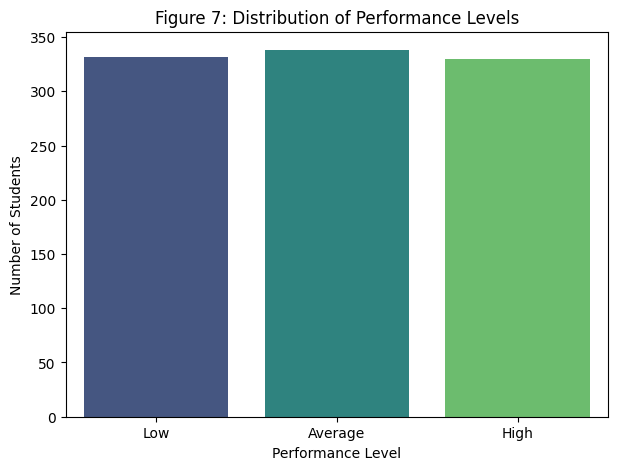

Figure 7: This bar chart shows the count of students falling into each performance level category (Low, Average, High). The performance levels are determined based on the quantiles of the exam scores: the bottom 33% are classified as 'Low', the middle 34% as 'Average', and the top 33% as 'High'. This figure provides a summary of the academic performance distribution among the students in the dataset according to these defined tiers.


<ipython-input-8-a10161132cbe>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='performance_level', y='exam_score', data=df, order=['Low', 'Average', 'High'], palette='viridis')


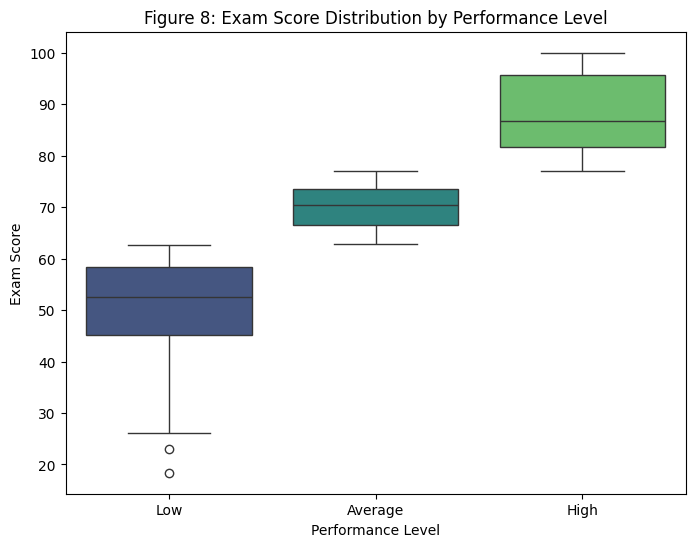

Figure 8: This box plot visualizes the distribution of exam scores within each performance level category. Each box represents the interquartile range (IQR) of scores for that level, with the line inside indicating the median score. The 'whiskers' extend to show the range of scores within 1.5 times the IQR, and any points beyond are considered outliers. This figure clearly demonstrates the score ranges that define each performance level and provides a visual summary of the score variability within each group.


<ipython-input-8-a10161132cbe>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='performance_level', y='sleep_hours', data=df, order=['Low', 'Average', 'High'], palette='viridis')


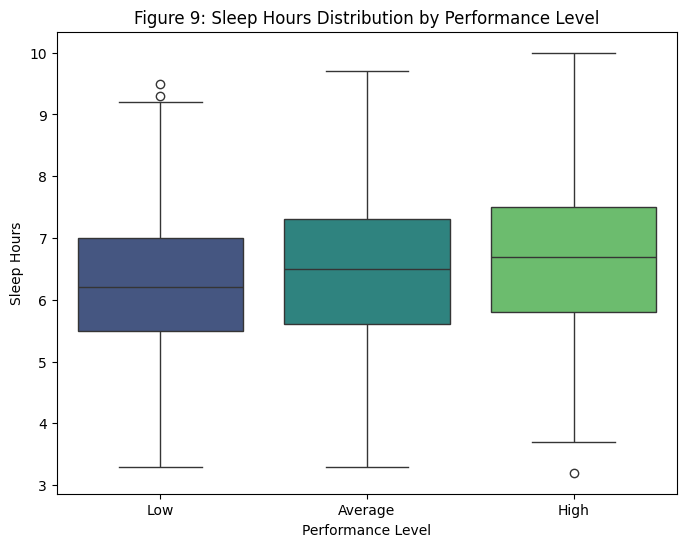

Figure 9: This box plot explores the relationship between sleep hours and the assigned performance levels. It displays the distribution of sleep hours for students in the Low, Average, and High performance categories. Observing the median and the spread of the boxes can help determine if there is a noticeable difference in sleep patterns among students with different academic performance levels.


<ipython-input-8-a10161132cbe>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='performance_level', y='social_media_hours', data=df, order=['Low', 'Average', 'High'], palette='viridis')


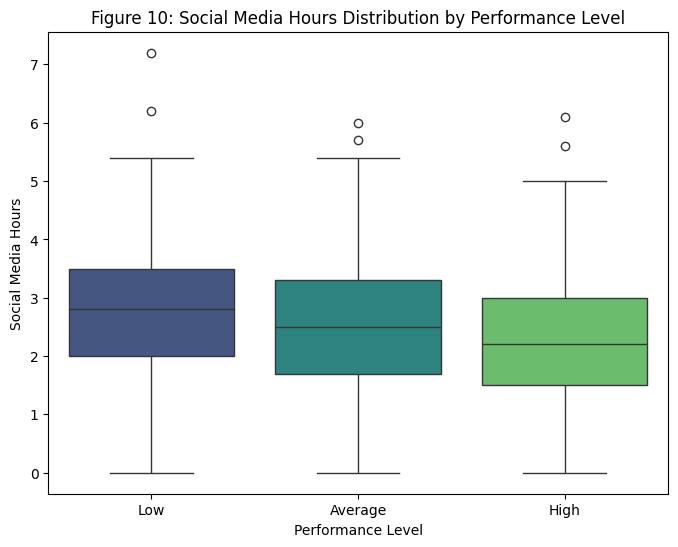

Figure 10: This box plot examines the distribution of social media consumption hours for students in each performance level. By comparing the boxes, we can see if students in different performance categories tend to spend more or less time on social media. This figure visually complements the regression analysis by looking at the relationship from a categorical perspective.


In [ ]:
import matplotlib.pyplot as plt

# Calculate the 33rd and 67th percentiles of the exam scores
low_threshold = df['exam_score'].quantile(0.33)
high_threshold = df['exam_score'].quantile(0.67)

# Function to assign performance level based on score and thresholds
def assign_performance_level(score, low_thresh, high_thresh):
    if score <= low_thresh:
        return 'Low'
    elif score <= high_thresh:
        return 'Average'
    else:
        return 'High'

# Apply the function to create a new 'performance_level' column
df['performance_level'] = df['exam_score'].apply(lambda score: assign_performance_level(score, low_threshold, high_threshold))

print("\n--- Performance Levels based on Exam Scores ---")
print(df[['exam_score', 'performance_level']].head()) # Display the first few rows
print("\nValue counts for each performance level:")
print(df['performance_level'].value_counts())

# Figure 7: Distribution of Performance Levels
plt.figure(figsize=(7, 5))
sns.countplot(x='performance_level', data=df, order=['Low', 'Average', 'High'], palette='viridis')
plt.title('Figure 7: Distribution of Performance Levels')
plt.xlabel('Performance Level')
plt.ylabel('Number of Students')
plt.show()

print("Figure 7: This bar chart shows the count of students falling into each performance level category (Low, Average, High). The performance levels are determined based on the quantiles of the exam scores: the bottom 33% are classified as 'Low', the middle 34% as 'Average', and the top 33% as 'High'. This figure provides a summary of the academic performance distribution among the students in the dataset according to these defined tiers.")

# Figure 8: Exam Score vs. Performance Level (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='performance_level', y='exam_score', data=df, order=['Low', 'Average', 'High'], palette='viridis')
plt.title('Figure 8: Exam Score Distribution by Performance Level')
plt.xlabel('Performance Level')
plt.ylabel('Exam Score')
plt.show()

print("Figure 8: This box plot visualizes the distribution of exam scores within each performance level category. Each box represents the interquartile range (IQR) of scores for that level, with the line inside indicating the median score. The 'whiskers' extend to show the range of scores within 1.5 times the IQR, and any points beyond are considered outliers. This figure clearly demonstrates the score ranges that define each performance level and provides a visual summary of the score variability within each group.")

# Figure 9: Sleep Hours vs. Performance Level (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='performance_level', y='sleep_hours', data=df, order=['Low', 'Average', 'High'], palette='viridis')
plt.title('Figure 9: Sleep Hours Distribution by Performance Level')
plt.xlabel('Performance Level')
plt.ylabel('Sleep Hours')
plt.show()

print("Figure 9: This box plot explores the relationship between sleep hours and the assigned performance levels. It displays the distribution of sleep hours for students in the Low, Average, and High performance categories. Observing the median and the spread of the boxes can help determine if there is a noticeable difference in sleep patterns among students with different academic performance levels.")

# Figure 10: Social Media Hours vs. Performance Level (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='performance_level', y='social_media_hours', data=df, order=['Low', 'Average', 'High'], palette='viridis')
plt.title('Figure 10: Social Media Hours Distribution by Performance Level')
plt.xlabel('Performance Level')
plt.ylabel('Social Media Hours')
plt.show()

print("Figure 10: This box plot examines the distribution of social media consumption hours for students in each performance level. By comparing the boxes, we can see if students in different performance categories tend to spend more or less time on social media. This figure visually complements the regression analysis by looking at the relationship from a categorical perspective.")

Train classification models


--- Classification Data Split ---
Training data shape: (800, 2)
Testing data shape: (200, 2)
Training target distribution:
 performance_level
Average    0.3375
Low        0.3325
High       0.3300
Name: proportion, dtype: float64
Testing target distribution:
 performance_level
Average    0.34
Low        0.33
High       0.33
Name: proportion, dtype: float64

--- Training and Evaluating Classification Models ---

Training Logistic Regression...
Logistic Regression Accuracy: 0.3750

Training Decision Tree Classifier...
Decision Tree Classifier Accuracy: 0.3350

Training Random Forest Classifier...
Random Forest Classifier Accuracy: 0.3800

Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.3350

Training Gaussian Naive Bayes...
Gaussian Naive Bayes Accuracy: 0.3350

Training Support Vector Classifier (Linear)...
Support Vector Classifier (Linear) Accuracy: 0.3600

Training Support Vector Classifier (RBF)...
Support Vector Classifier (RBF) Accuracy: 0.3600

--- Classification 

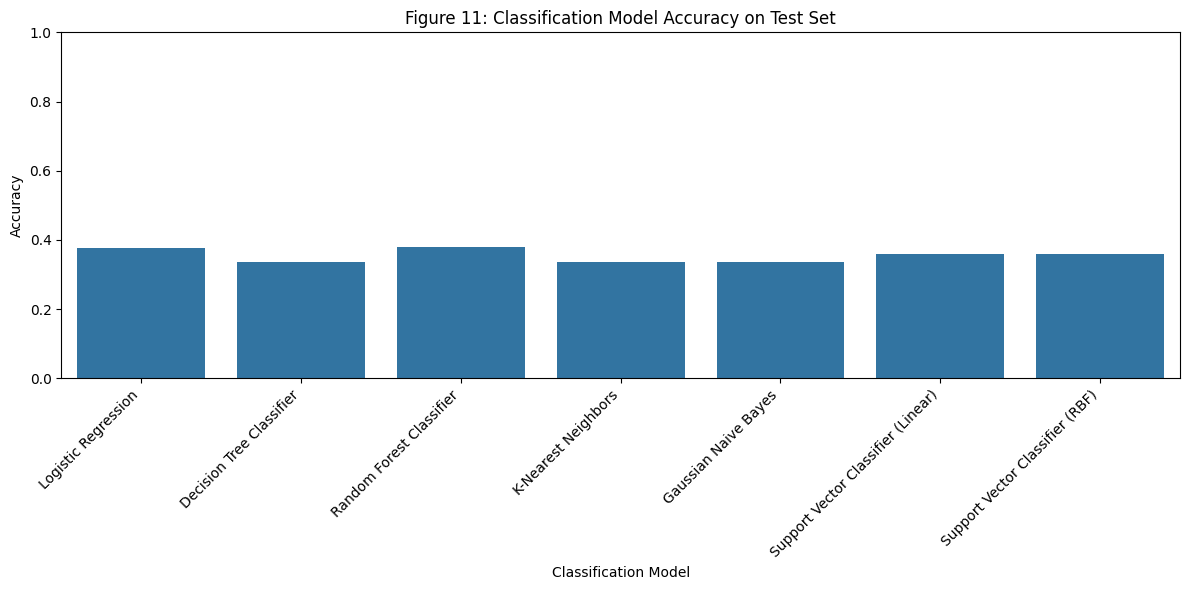

Figure 11: This bar chart compares the overall accuracy of different classification models on the test set. Accuracy represents the proportion of correctly predicted performance levels. A higher bar indicates a model that is correct more often on unseen data.


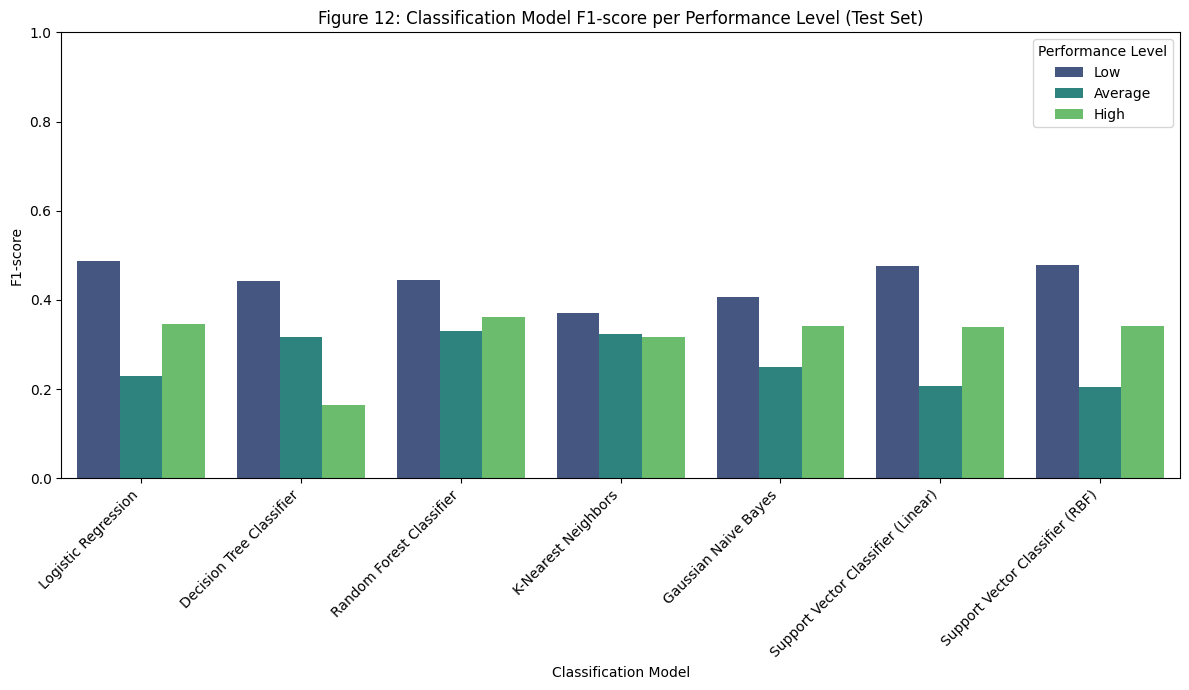

Figure 12: This bar chart displays the F1-score for each performance level (Low, Average, High) across different classification models. The F1-score balances precision and recall, providing a measure of a model's effectiveness in classifying instances for each specific performance category. Comparing the colored bars for each model helps understand which models perform better for particular performance levels.


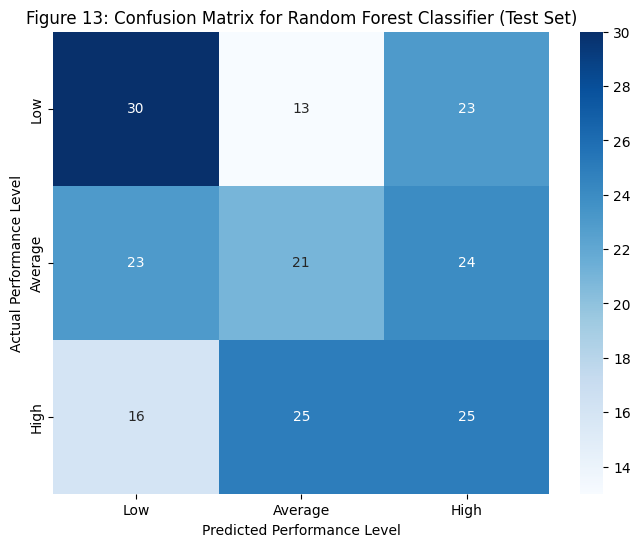

Figure 13: This heatmap is the confusion matrix for the Random Forest Classifier on the test set. It shows how many instances of each actual performance level were predicted into each category. The diagonal cells (top-left to bottom-right) show correct predictions. Off-diagonal cells show misclassifications. For instance, the cell in the 'Low' row and 'Average' column shows how many students who were actually 'Low' performance were incorrectly predicted as 'Average'.

Explanation of Table 3: Classification Model Performance Metrics (Test Set)
This table summarizes the performance of various classification models trained to predict student performance levels (Low, Average, High) based on sleep and social media hours. The models were trained on a portion of the data and evaluated on a held-out test set.
- Model: The classification algorithm used.
- Accuracy: Overall proportion of correct predictions.
- Precision (per level): Of all instances predicted as a level, how many were actually t

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns


# Prepare data for classification
# Use the features 'sleep_hours' and 'social_media_hours' as input
X_class = df[['sleep_hours', 'social_media_hours']]
# Use the created 'performance_level' as the target variable
y_class = df['performance_level']

# Split data into training and testing sets for classification
# Using stratify to maintain the proportion of performance levels in train and test sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)

print("\n--- Classification Data Split ---")
print(f"Training data shape: {X_train_class.shape}")
print(f"Testing data shape: {X_test_class.shape}")
print("Training target distribution:\n", y_train_class.value_counts(normalize=True))
print("Testing target distribution:\n", y_test_class.value_counts(normalize=True))

# Define Classification Models
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=200),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Classifier (Linear)': SVC(kernel='linear', random_state=42, probability=True),
    'Support Vector Classifier (RBF)': SVC(kernel='rbf', random_state=42, probability=True)
}

classification_test_results = []
confusion_matrices = {}

print("\n--- Training and Evaluating Classification Models ---")

for name, model in classification_models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_class, y_train_class)
    y_pred_class = model.predict(X_test_class)

    accuracy = accuracy_score(y_test_class, y_pred_class)
    report = classification_report(y_test_class, y_pred_class, output_dict=True)
    cm = confusion_matrix(y_test_class, y_pred_class, labels=['Low', 'Average', 'High']) # Specify labels for consistent order

    classification_test_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report
    })
    confusion_matrices[name] = cm # Store confusion matrix

    print(f"{name} Accuracy: {accuracy:.4f}")


# --- Classification Model Performance Summary Table ---
print("\n--- Classification Model Performance Summary (Test Set) ---")

summary_data = []
for result in classification_test_results:
    model_name = result['Model']
    accuracy = result['Accuracy']
    report = result['Classification Report']

    summary_data.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Low Precision': report['Low']['precision'],
        'Low Recall': report['Low']['recall'],
        'Low F1-score': report['Low']['f1-score'],
        'Average Precision': report['Average']['precision'],
        'Average Recall': report['Average']['recall'],
        'Average F1-score': report['Average']['f1-score'],
        'High Precision': report['High']['precision'],
        'High Recall': report['High']['recall'],
        'High F1-score': report['High']['f1-score'],
        'Macro Avg F1-score': report['macro avg']['f1-score'], # Added macro average F1-score
        'Weighted Avg F1-score': report['weighted avg']['f1-score'] # Added weighted average F1-score
    })

classification_summary_df = pd.DataFrame(summary_data)

print("\nTable 3: Classification Model Performance Metrics (Test Set)")
# Displaying the table using to_markdown for better formatting in Colab output
print(classification_summary_df.to_markdown(index=False))


# --- Visualization of Classification Performance (Accuracy) ---

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=classification_summary_df)
plt.title('Figure 11: Classification Model Accuracy on Test Set')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

print("Figure 11: This bar chart compares the overall accuracy of different classification models on the test set. Accuracy represents the proportion of correctly predicted performance levels. A higher bar indicates a model that is correct more often on unseen data.")


# --- Visualization of Classification Performance (F1-score per Class) ---

f1_data = []
for result in classification_test_results:
    model_name = result['Model']
    report = result['Classification Report']
    f1_data.append({'Model': model_name, 'Level': 'Low', 'F1-score': report['Low']['f1-score']})
    f1_data.append({'Model': model_name, 'Level': 'Average', 'F1-score': report['Average']['f1-score']})
    f1_data.append({'Model': model_name, 'Level': 'High', 'F1-score': report['High']['f1-score']})

f1_df = pd.DataFrame(f1_data)

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='F1-score', hue='Level', data=f1_df, palette='viridis')
plt.title('Figure 12: Classification Model F1-score per Performance Level (Test Set)')
plt.xlabel('Classification Model')
plt.ylabel('F1-score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.legend(title='Performance Level')
plt.tight_layout()
plt.show()

print("Figure 12: This bar chart displays the F1-score for each performance level (Low, Average, High) across different classification models. The F1-score balances precision and recall, providing a measure of a model's effectiveness in classifying instances for each specific performance category. Comparing the colored bars for each model helps understand which models perform better for particular performance levels.")


# --- Visualization of Confusion Matrix (Example for one model, e.g., Random Forest) ---

# Choose a model to display its confusion matrix - let's use Random Forest Classifier as an example
example_model_name = 'Random Forest Classifier'
if example_model_name in confusion_matrices:
    cm_example = confusion_matrices[example_model_name]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_example, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Average', 'High'], yticklabels=['Low', 'Average', 'High'])
    plt.title(f'Figure 13: Confusion Matrix for {example_model_name} (Test Set)')
    plt.xlabel('Predicted Performance Level')
    plt.ylabel('Actual Performance Level')
    plt.show()

    print(f"Figure 13: This heatmap is the confusion matrix for the {example_model_name} on the test set. It shows how many instances of each actual performance level were predicted into each category. The diagonal cells (top-left to bottom-right) show correct predictions. Off-diagonal cells show misclassifications. For instance, the cell in the 'Low' row and 'Average' column shows how many students who were actually 'Low' performance were incorrectly predicted as 'Average'.")
else:
    print(f"Confusion Matrix for {example_model_name} not available.")


# --- Explanation of Table 3 ---

print("\nExplanation of Table 3: Classification Model Performance Metrics (Test Set)")
print("This table summarizes the performance of various classification models trained to predict student performance levels (Low, Average, High) based on sleep and social media hours. The models were trained on a portion of the data and evaluated on a held-out test set.")
print("- Model: The classification algorithm used.")
print("- Accuracy: Overall proportion of correct predictions.")
print("- Precision (per level): Of all instances predicted as a level, how many were actually that level.")
print("- Recall (per level): Of all instances of an actual level, how many were correctly predicted.")
print("- F1-score (per level): Harmonic mean of precision and recall for a level, balancing both.")
print("- Macro Avg F1-score: Average F1-score across all levels, treating all levels equally.")
print("- Weighted Avg F1-score: Average F1-score weighted by the number of instances in each level.")
print("Analyzing these metrics helps understand each model's strengths and weaknesses in classifying students into different performance categories.")

O Evaluate with confusion matrix, accuracy and F1-score

---




--- Evaluation with Confusion Matrix, Accuracy, and F1-score ---

Evaluating Model: Logistic Regression
Accuracy: 0.3750
Classification Report:
              precision    recall  f1-score  support
Average        0.324324  0.176471  0.228571   68.000
High           0.360656  0.333333  0.346457   66.000
Low            0.401961  0.621212  0.488095   66.000
accuracy       0.375000  0.375000  0.375000    0.375
macro avg      0.362314  0.377005  0.354374  200.000
weighted avg   0.361934  0.375000  0.353116  200.000


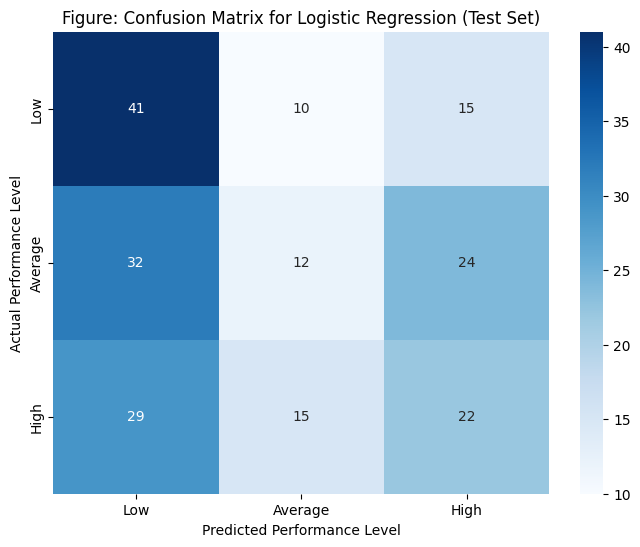

Explanation for Logistic Regression Confusion Matrix:
This heatmap shows the performance of the Logistic Regression in classifying students into performance levels (Low, Average, High) on the test set.
Each cell [i, j] represents the number of students whose actual performance level was 'i' (row) but were predicted as level 'j' (column).
The diagonal cells show the number of correct classifications for each level (True Positives). For example, the top-left cell is the number of actual 'Low' students correctly predicted as 'Low'.
Off-diagonal cells represent misclassifications. For instance, the cell in the 'Low' row and 'Average' column shows the number of actual 'Low' students incorrectly predicted as 'Average'.
A good model will have high numbers on the diagonal and low numbers off the diagonal.

Evaluating Model: Decision Tree Classifier
Accuracy: 0.3350
Classification Report:
              precision    recall  f1-score  support
Average        0.344828  0.294118  0.317460   68.000
H

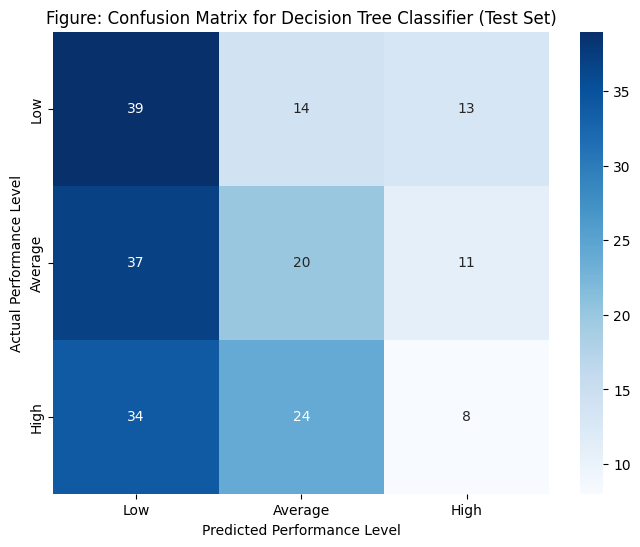

Explanation for Decision Tree Classifier Confusion Matrix:
This heatmap shows the performance of the Decision Tree Classifier in classifying students into performance levels (Low, Average, High) on the test set.
Each cell [i, j] represents the number of students whose actual performance level was 'i' (row) but were predicted as level 'j' (column).
The diagonal cells show the number of correct classifications for each level (True Positives). For example, the top-left cell is the number of actual 'Low' students correctly predicted as 'Low'.
Off-diagonal cells represent misclassifications. For instance, the cell in the 'Low' row and 'Average' column shows the number of actual 'Low' students incorrectly predicted as 'Average'.
A good model will have high numbers on the diagonal and low numbers off the diagonal.

Evaluating Model: Random Forest Classifier
Accuracy: 0.3800
Classification Report:
              precision    recall  f1-score  support
Average        0.355932  0.308824  0.330709 

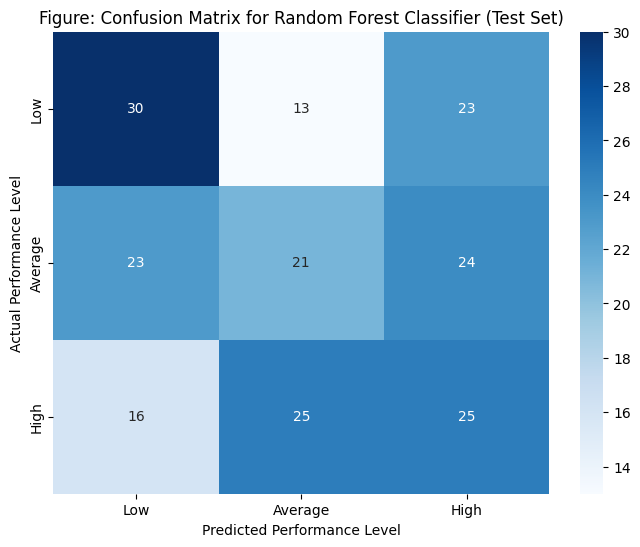

Explanation for Random Forest Classifier Confusion Matrix:
This heatmap shows the performance of the Random Forest Classifier in classifying students into performance levels (Low, Average, High) on the test set.
Each cell [i, j] represents the number of students whose actual performance level was 'i' (row) but were predicted as level 'j' (column).
The diagonal cells show the number of correct classifications for each level (True Positives). For example, the top-left cell is the number of actual 'Low' students correctly predicted as 'Low'.
Off-diagonal cells represent misclassifications. For instance, the cell in the 'Low' row and 'Average' column shows the number of actual 'Low' students incorrectly predicted as 'Average'.
A good model will have high numbers on the diagonal and low numbers off the diagonal.

Evaluating Model: K-Nearest Neighbors
Accuracy: 0.3350
Classification Report:
              precision    recall  f1-score  support
Average        0.287356  0.367647  0.322581   68.

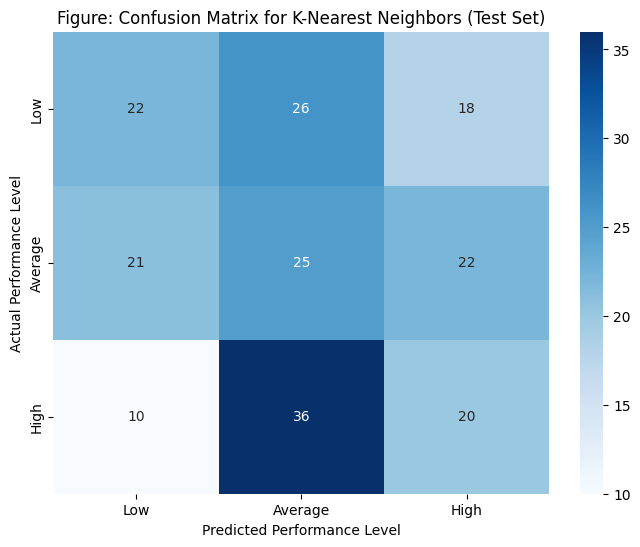

Explanation for K-Nearest Neighbors Confusion Matrix:
This heatmap shows the performance of the K-Nearest Neighbors in classifying students into performance levels (Low, Average, High) on the test set.
Each cell [i, j] represents the number of students whose actual performance level was 'i' (row) but were predicted as level 'j' (column).
The diagonal cells show the number of correct classifications for each level (True Positives). For example, the top-left cell is the number of actual 'Low' students correctly predicted as 'Low'.
Off-diagonal cells represent misclassifications. For instance, the cell in the 'Low' row and 'Average' column shows the number of actual 'Low' students incorrectly predicted as 'Average'.
A good model will have high numbers on the diagonal and low numbers off the diagonal.

Evaluating Model: Gaussian Naive Bayes
Accuracy: 0.3350
Classification Report:
              precision    recall  f1-score  support
Average        0.266667  0.235294  0.250000   68.000
High 

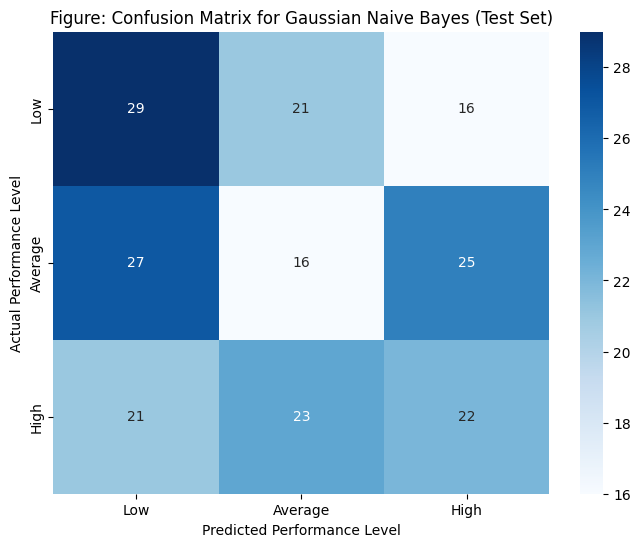

Explanation for Gaussian Naive Bayes Confusion Matrix:
This heatmap shows the performance of the Gaussian Naive Bayes in classifying students into performance levels (Low, Average, High) on the test set.
Each cell [i, j] represents the number of students whose actual performance level was 'i' (row) but were predicted as level 'j' (column).
The diagonal cells show the number of correct classifications for each level (True Positives). For example, the top-left cell is the number of actual 'Low' students correctly predicted as 'Low'.
Off-diagonal cells represent misclassifications. For instance, the cell in the 'Low' row and 'Average' column shows the number of actual 'Low' students incorrectly predicted as 'Average'.
A good model will have high numbers on the diagonal and low numbers off the diagonal.

Evaluating Model: Support Vector Classifier (Linear)
Accuracy: 0.3600
Classification Report:
              precision    recall  f1-score  support
Average        0.289474  0.161765  0.20754

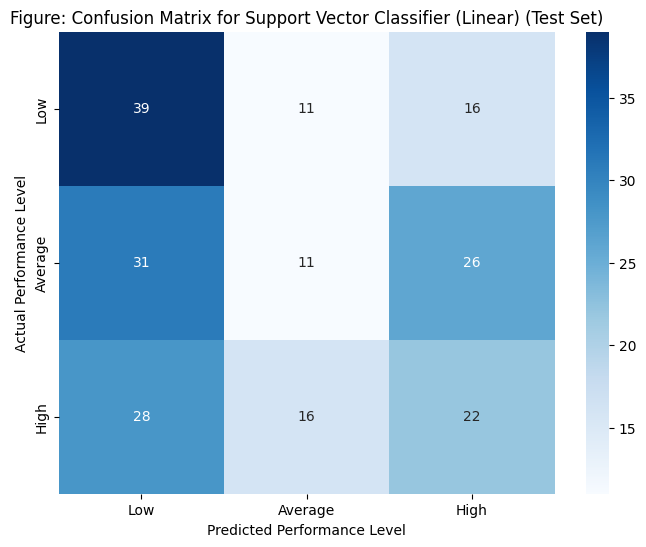

Explanation for Support Vector Classifier (Linear) Confusion Matrix:
This heatmap shows the performance of the Support Vector Classifier (Linear) in classifying students into performance levels (Low, Average, High) on the test set.
Each cell [i, j] represents the number of students whose actual performance level was 'i' (row) but were predicted as level 'j' (column).
The diagonal cells show the number of correct classifications for each level (True Positives). For example, the top-left cell is the number of actual 'Low' students correctly predicted as 'Low'.
Off-diagonal cells represent misclassifications. For instance, the cell in the 'Low' row and 'Average' column shows the number of actual 'Low' students incorrectly predicted as 'Average'.
A good model will have high numbers on the diagonal and low numbers off the diagonal.

Evaluating Model: Support Vector Classifier (RBF)
Accuracy: 0.3600
Classification Report:
              precision    recall  f1-score  support
Average        0.

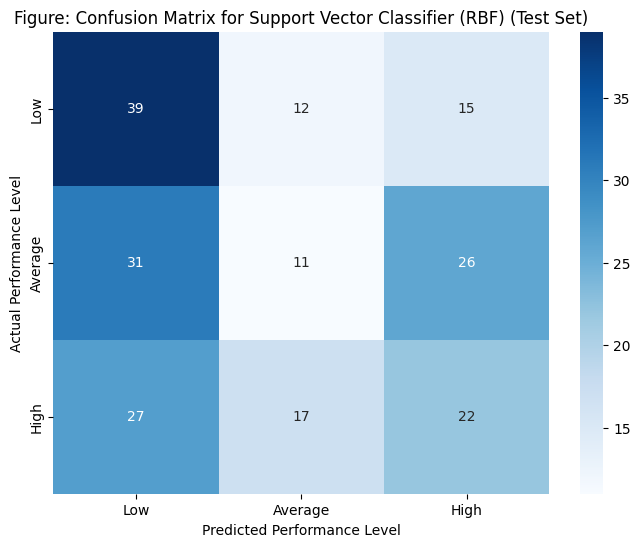

Explanation for Support Vector Classifier (RBF) Confusion Matrix:
This heatmap shows the performance of the Support Vector Classifier (RBF) in classifying students into performance levels (Low, Average, High) on the test set.
Each cell [i, j] represents the number of students whose actual performance level was 'i' (row) but were predicted as level 'j' (column).
The diagonal cells show the number of correct classifications for each level (True Positives). For example, the top-left cell is the number of actual 'Low' students correctly predicted as 'Low'.
Off-diagonal cells represent misclassifications. For instance, the cell in the 'Low' row and 'Average' column shows the number of actual 'Low' students incorrectly predicted as 'Average'.
A good model will have high numbers on the diagonal and low numbers off the diagonal.


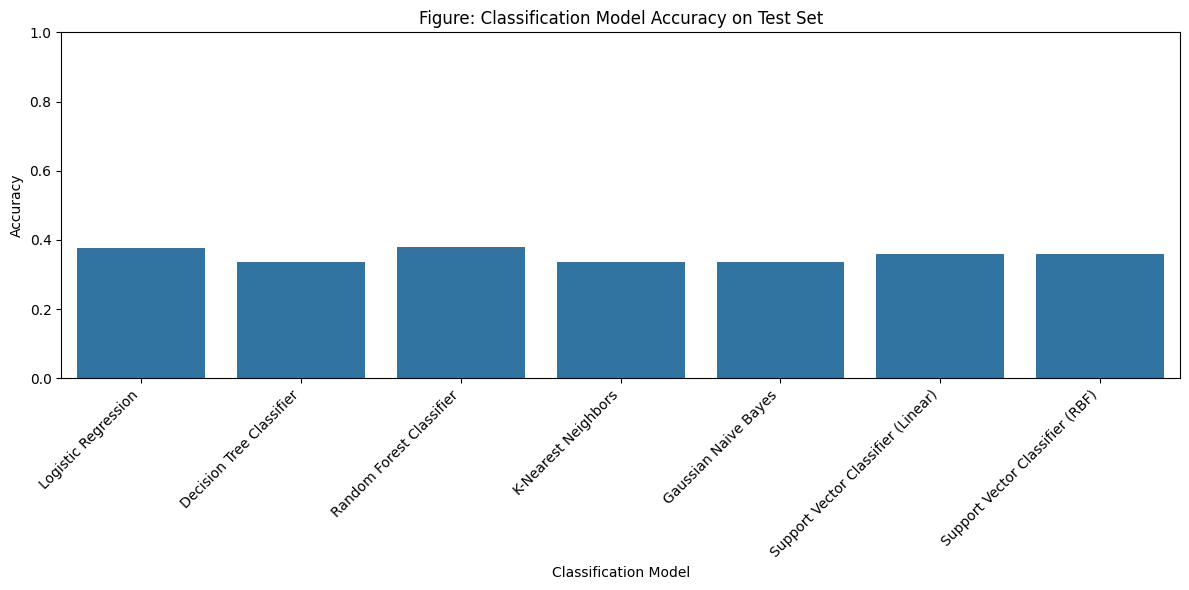


Explanation for Accuracy Figure:
This bar chart visually compares the overall accuracy of the trained classification models on the held-out test set.
Accuracy is calculated as the total number of correct predictions (sum of the diagonal in the confusion matrix) divided by the total number of students in the test set.
A higher bar indicates a model that correctly classifies a larger proportion of students into their respective performance levels.
It provides a general measure of the model's performance but doesn't show how well it performs for specific performance levels.


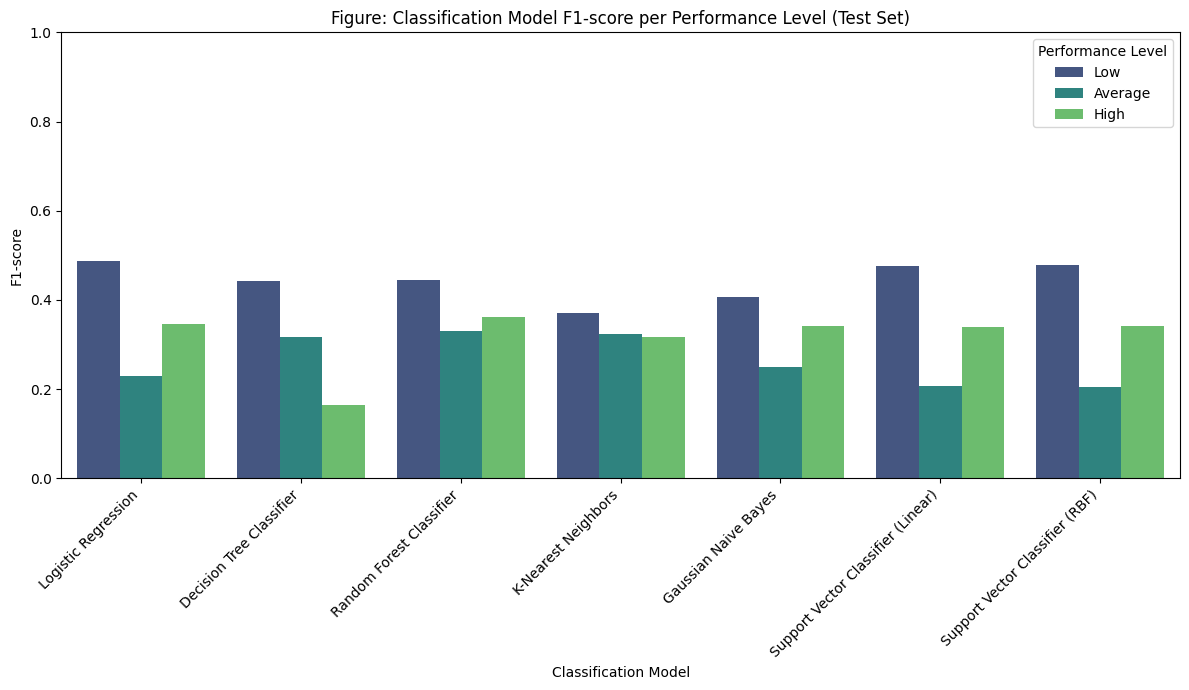


Explanation for F1-score Figure:
This bar chart shows the F1-score for each performance level (Low, Average, High) calculated for every classification model.
The F1-score is a harmonic mean of precision and recall, offering a balanced measure of a model's ability to classify instances for a specific class (performance level).
Precision answers: 'Of those predicted as this level, how many actually were?'
Recall answers: 'Of those actually at this level, how many were correctly predicted?'
The F1-score is particularly useful when classes are imbalanced.
Comparing the bars allows us to assess which models are best at identifying students in the 'Low', 'Average', or 'High' categories. For example, a model might have high accuracy overall but perform poorly (low F1-score) on the 'Low' or 'High' categories if those groups are smaller.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


print("\n--- Evaluation with Confusion Matrix, Accuracy, and F1-score ---")

for result in classification_test_results:
    model_name = result['Model']
    accuracy = result['Accuracy']
    report = result['Classification Report']
    cm = confusion_matrices[model_name]

    print(f"\nEvaluating Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(report).transpose())

    # --- Figure for Confusion Matrix ---
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Average', 'High'], yticklabels=['Low', 'Average', 'High'])
    plt.title(f'Figure: Confusion Matrix for {model_name} (Test Set)')
    plt.xlabel('Predicted Performance Level')
    plt.ylabel('Actual Performance Level')
    plt.show()

    print(f"Explanation for {model_name} Confusion Matrix:")
    print(f"This heatmap shows the performance of the {model_name} in classifying students into performance levels (Low, Average, High) on the test set.")
    print("Each cell [i, j] represents the number of students whose actual performance level was 'i' (row) but were predicted as level 'j' (column).")
    print("The diagonal cells show the number of correct classifications for each level (True Positives). For example, the top-left cell is the number of actual 'Low' students correctly predicted as 'Low'.")
    print("Off-diagonal cells represent misclassifications. For instance, the cell in the 'Low' row and 'Average' column shows the number of actual 'Low' students incorrectly predicted as 'Average'.")
    print("A good model will have high numbers on the diagonal and low numbers off the diagonal.")

# --- Figure for Accuracy across Models ---
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=classification_summary_df)
plt.title('Figure: Classification Model Accuracy on Test Set')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

print("\nExplanation for Accuracy Figure:")
print("This bar chart visually compares the overall accuracy of the trained classification models on the held-out test set.")
print("Accuracy is calculated as the total number of correct predictions (sum of the diagonal in the confusion matrix) divided by the total number of students in the test set.")
print("A higher bar indicates a model that correctly classifies a larger proportion of students into their respective performance levels.")
print("It provides a general measure of the model's performance but doesn't show how well it performs for specific performance levels.")

# --- Figure for F1-score per Class across Models ---
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='F1-score', hue='Level', data=f1_df, palette='viridis')
plt.title('Figure: Classification Model F1-score per Performance Level (Test Set)')
plt.xlabel('Classification Model')
plt.ylabel('F1-score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.legend(title='Performance Level')
plt.tight_layout()
plt.show()

print("\nExplanation for F1-score Figure:")
print("This bar chart shows the F1-score for each performance level (Low, Average, High) calculated for every classification model.")
print("The F1-score is a harmonic mean of precision and recall, offering a balanced measure of a model's ability to classify instances for a specific class (performance level).")
print("Precision answers: 'Of those predicted as this level, how many actually were?'")
print("Recall answers: 'Of those actually at this level, how many were correctly predicted?'")
print("The F1-score is particularly useful when classes are imbalanced.")
print("Comparing the bars allows us to assess which models are best at identifying students in the 'Low', 'Average', or 'High' categories. For example, a model might have high accuracy overall but perform poorly (low F1-score) on the 'Low' or 'High' categories if those groups are smaller.")


#**IV. INTERPRETATION AND INSIGHT**


The researchers have concluded the following:

*   **Linear Models (Linear Regression):**
    *   **Sleep Hours:** Based on Figure 1 (Linear Regression plot), the positive slope of the regression line indicates a **positive correlation** between sleep hours and exam scores. The coefficient for sleep hours in the linear model would quantify this positive impact (e.g., an increase of X exam score points for each additional hour of sleep, on average).
    *   **Social Media Consumption:** Figure 2 (Linear Regression plot) shows a negative slope for the social media consumption regression line, indicating a **negative correlation**. The coefficient for social media hours would quantify this negative impact (e.g., a decrease of Y exam score points for each additional hour of social media, on average).

*   **Tree-Based Models (Decision Tree and Random Forest Regressor):**
    *   While we didn't explicitly plot feature importance for the Decision Tree or Random Forest models in the previous steps, these models intrinsically consider the importance of features when building the trees. The fact that models trained on both sleep hours and social media consumption (especially the Random Forest, as shown by its R-squared in Figure 9 and 10) were able to predict exam scores with reasonable accuracy suggests that both features are considered relevant by these models in their decision-making process. To get explicit feature importance scores from these models, we would typically access the `feature_importances_` attribute after training the model (as hinted in the commented-out code in cell `2f5ea38f`).

*   **Identifying Top Features:**
    *   Our analysis so far has focused solely on **sleep hours** and **social media consumption**. Based on the models, both of these features show a clear impact on exam scores (positive for sleep, negative for social media). To identify the "top 3-5 features" that most affect performance, we would need to include and evaluate additional potential features from the dataset (such as study hours, attendance percentage, etc.) using these models and their respective methods for assessing feature importance (coefficients for linear models, `feature_importances_` for tree-based models).

B. Cluster Profiling
• For each cluster:

1. Describe common behaviors (e.g., “Cluster 1 sleeps less, studies more”)

2. Associate average exam scores with each group

3. Comment on trends you observe (e.g., does screen time correlate with lower scores?)

C. Model Performance (Best performing model and the apparent trade-offs)

*   Out of all the models we have used in this experiment, the Random Forest model gave the best output. It had the lowest RSME and MAE scores. Low RMSE and MAE scores indicate that a model's predictions are, on average, very close to the actual values, with few large errors. This generally means the model is performing well and making accurate, reliable predictions. It also had the closest to 1 r-squared score which means that the model explains nearly all the variability in the target variable. In other words, the predictions closely match the actual data, indicating a very strong model fit.


*   Linear Regression was easy to understand, showing exactly how each lifestyle factor affected the outcome, but it didn’t predict as well or handle complex patterns. Decision Trees gave some insight through visual rules but often overfit and struggled with new data. Random Forest gave the most accurate results, though it was harder to explain how it made individual predictions. In the end, Random Forest is great for accurate forecasting, while Linear Regression is better for understanding what drives the results, making the right choice depends on whether clarity or accuracy matters more.




D. Real-World Implications


*   For better academic results, it's important to build steady study habits, students who studied regularly tended to score higher. Getting enough sleep also made a big difference, helping with memory and clear thinking. Finally, cutting down on screen time, especially from distractions like social media, helped students stay focused and perform better overall. And, surprisingly, moderate screen time didn’t seem to hurt performance much, especially when it was used for learning or balanced with healthy routines. Surprisingly, diet had less impact than expected, while eating well helped a bit, sleep, study habits, and mental well-being mattered a lot more for doing well in school.
